# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.pyplot import figure
from itertools import chain

%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [20]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    res = []
    for x in X:
        if any([False if v >= -500 and v <= 500 else True for v in x]):
            res.append(-100000)
        else:
            res.append(-418.9829 * X.shape[1] + np.sum(x * np.sin(np.sqrt(np.abs(x)))))
    return np.array(res)
    return 418.9829 * X.shape[1] - np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [10]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [11]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [12]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

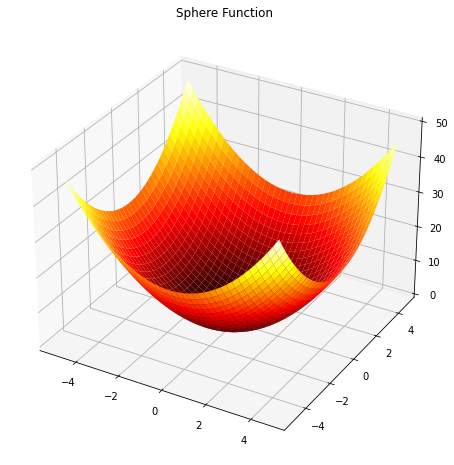

In [19]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

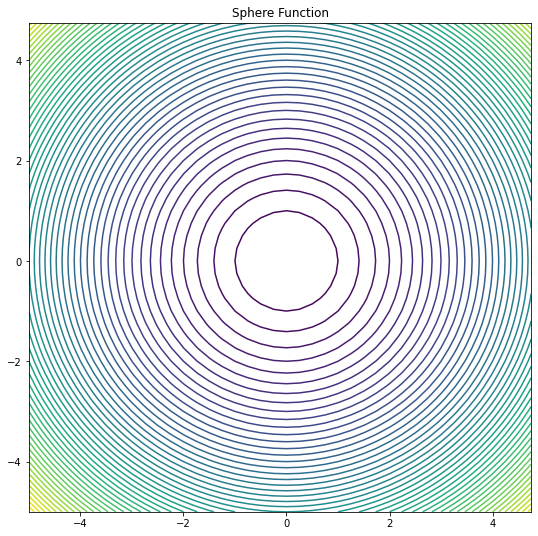

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

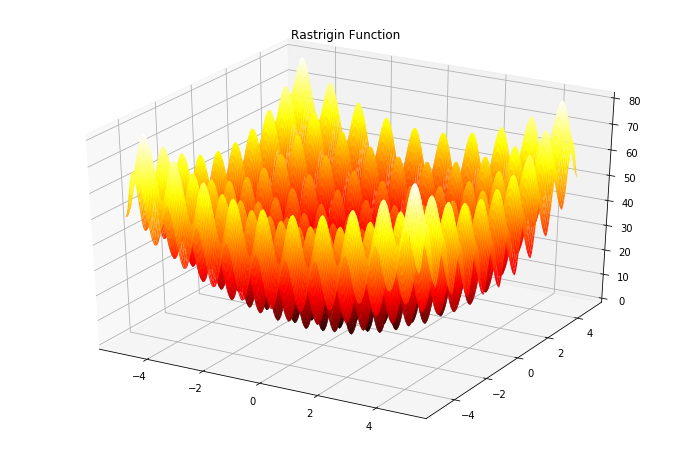

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

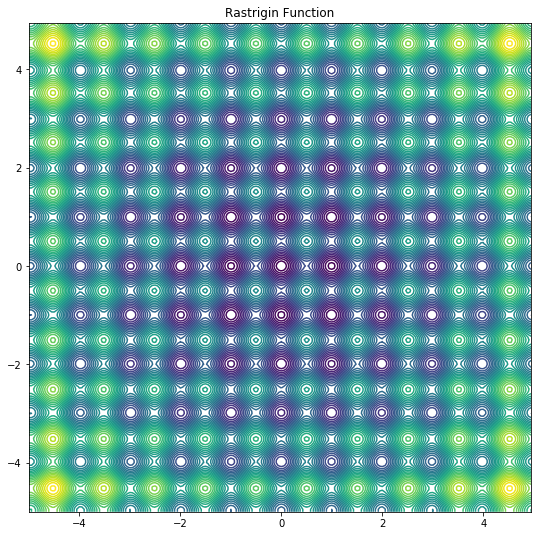

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

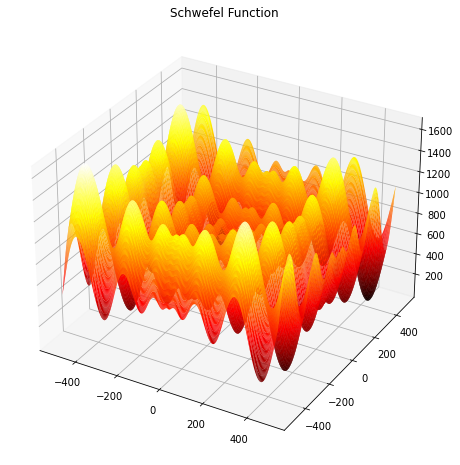

In [285]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

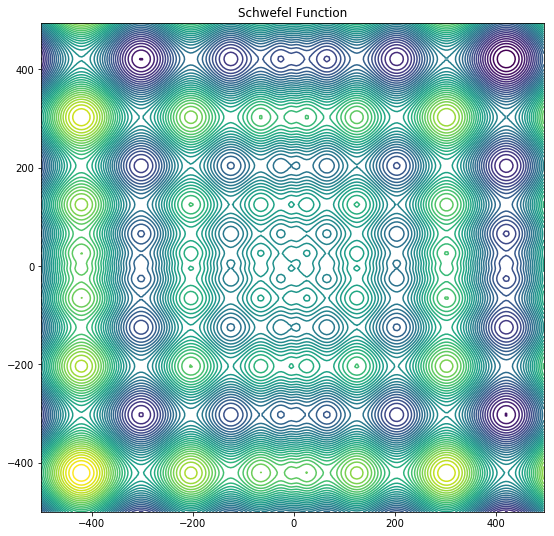

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

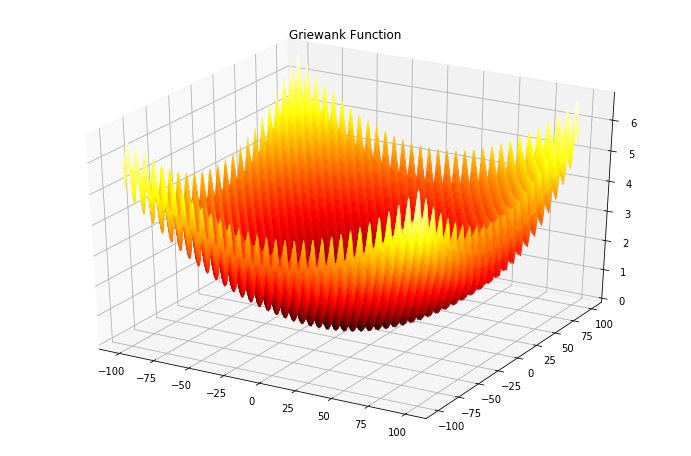

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

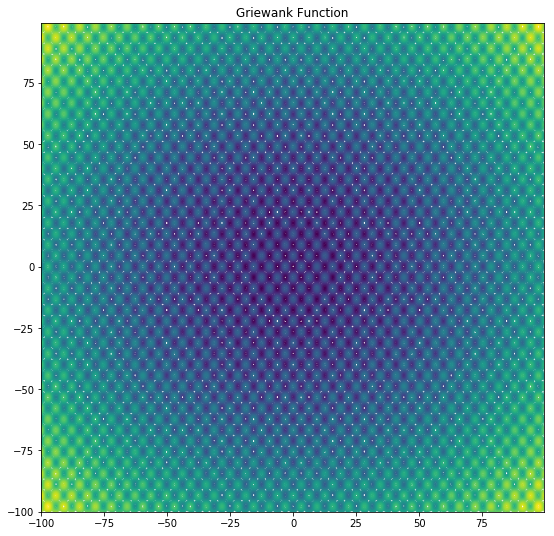

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [77]:
def ellipse(center, width, height, a=0):
    return Ellipse(center, width, height, angle=a)

In [13]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [58]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

<ipython-input-61-d76cda774b50>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().add_artist(el)


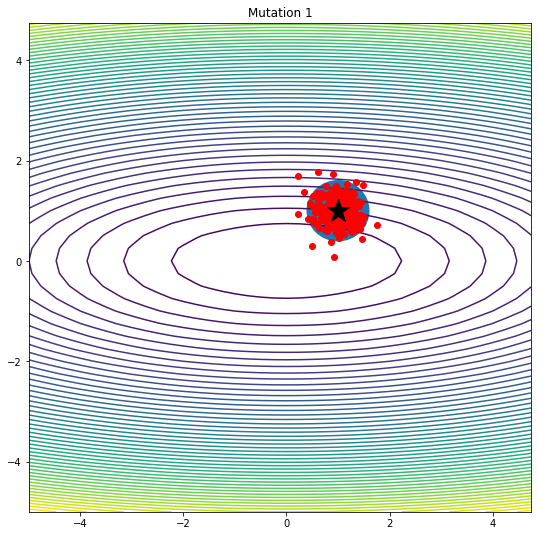

In [61]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
el = ellipse(original_individual[0], 2 * sigma * np.sqrt(5.991), 2 * sigma * np.sqrt(5.991))
plt.axes().add_artist(el)
plt.show()

In [121]:
def zad2a(mut, obj_fun):
    start = obj_fun(original_individual)[0]
    cnt = 0
    bst = -np.inf
    for m in mut:
        res = obj_fun(np.array([m]))[0]
        if res < start:
            cnt += 1
        if bst < res:
            bst = res
    return cnt / len(mut), bst

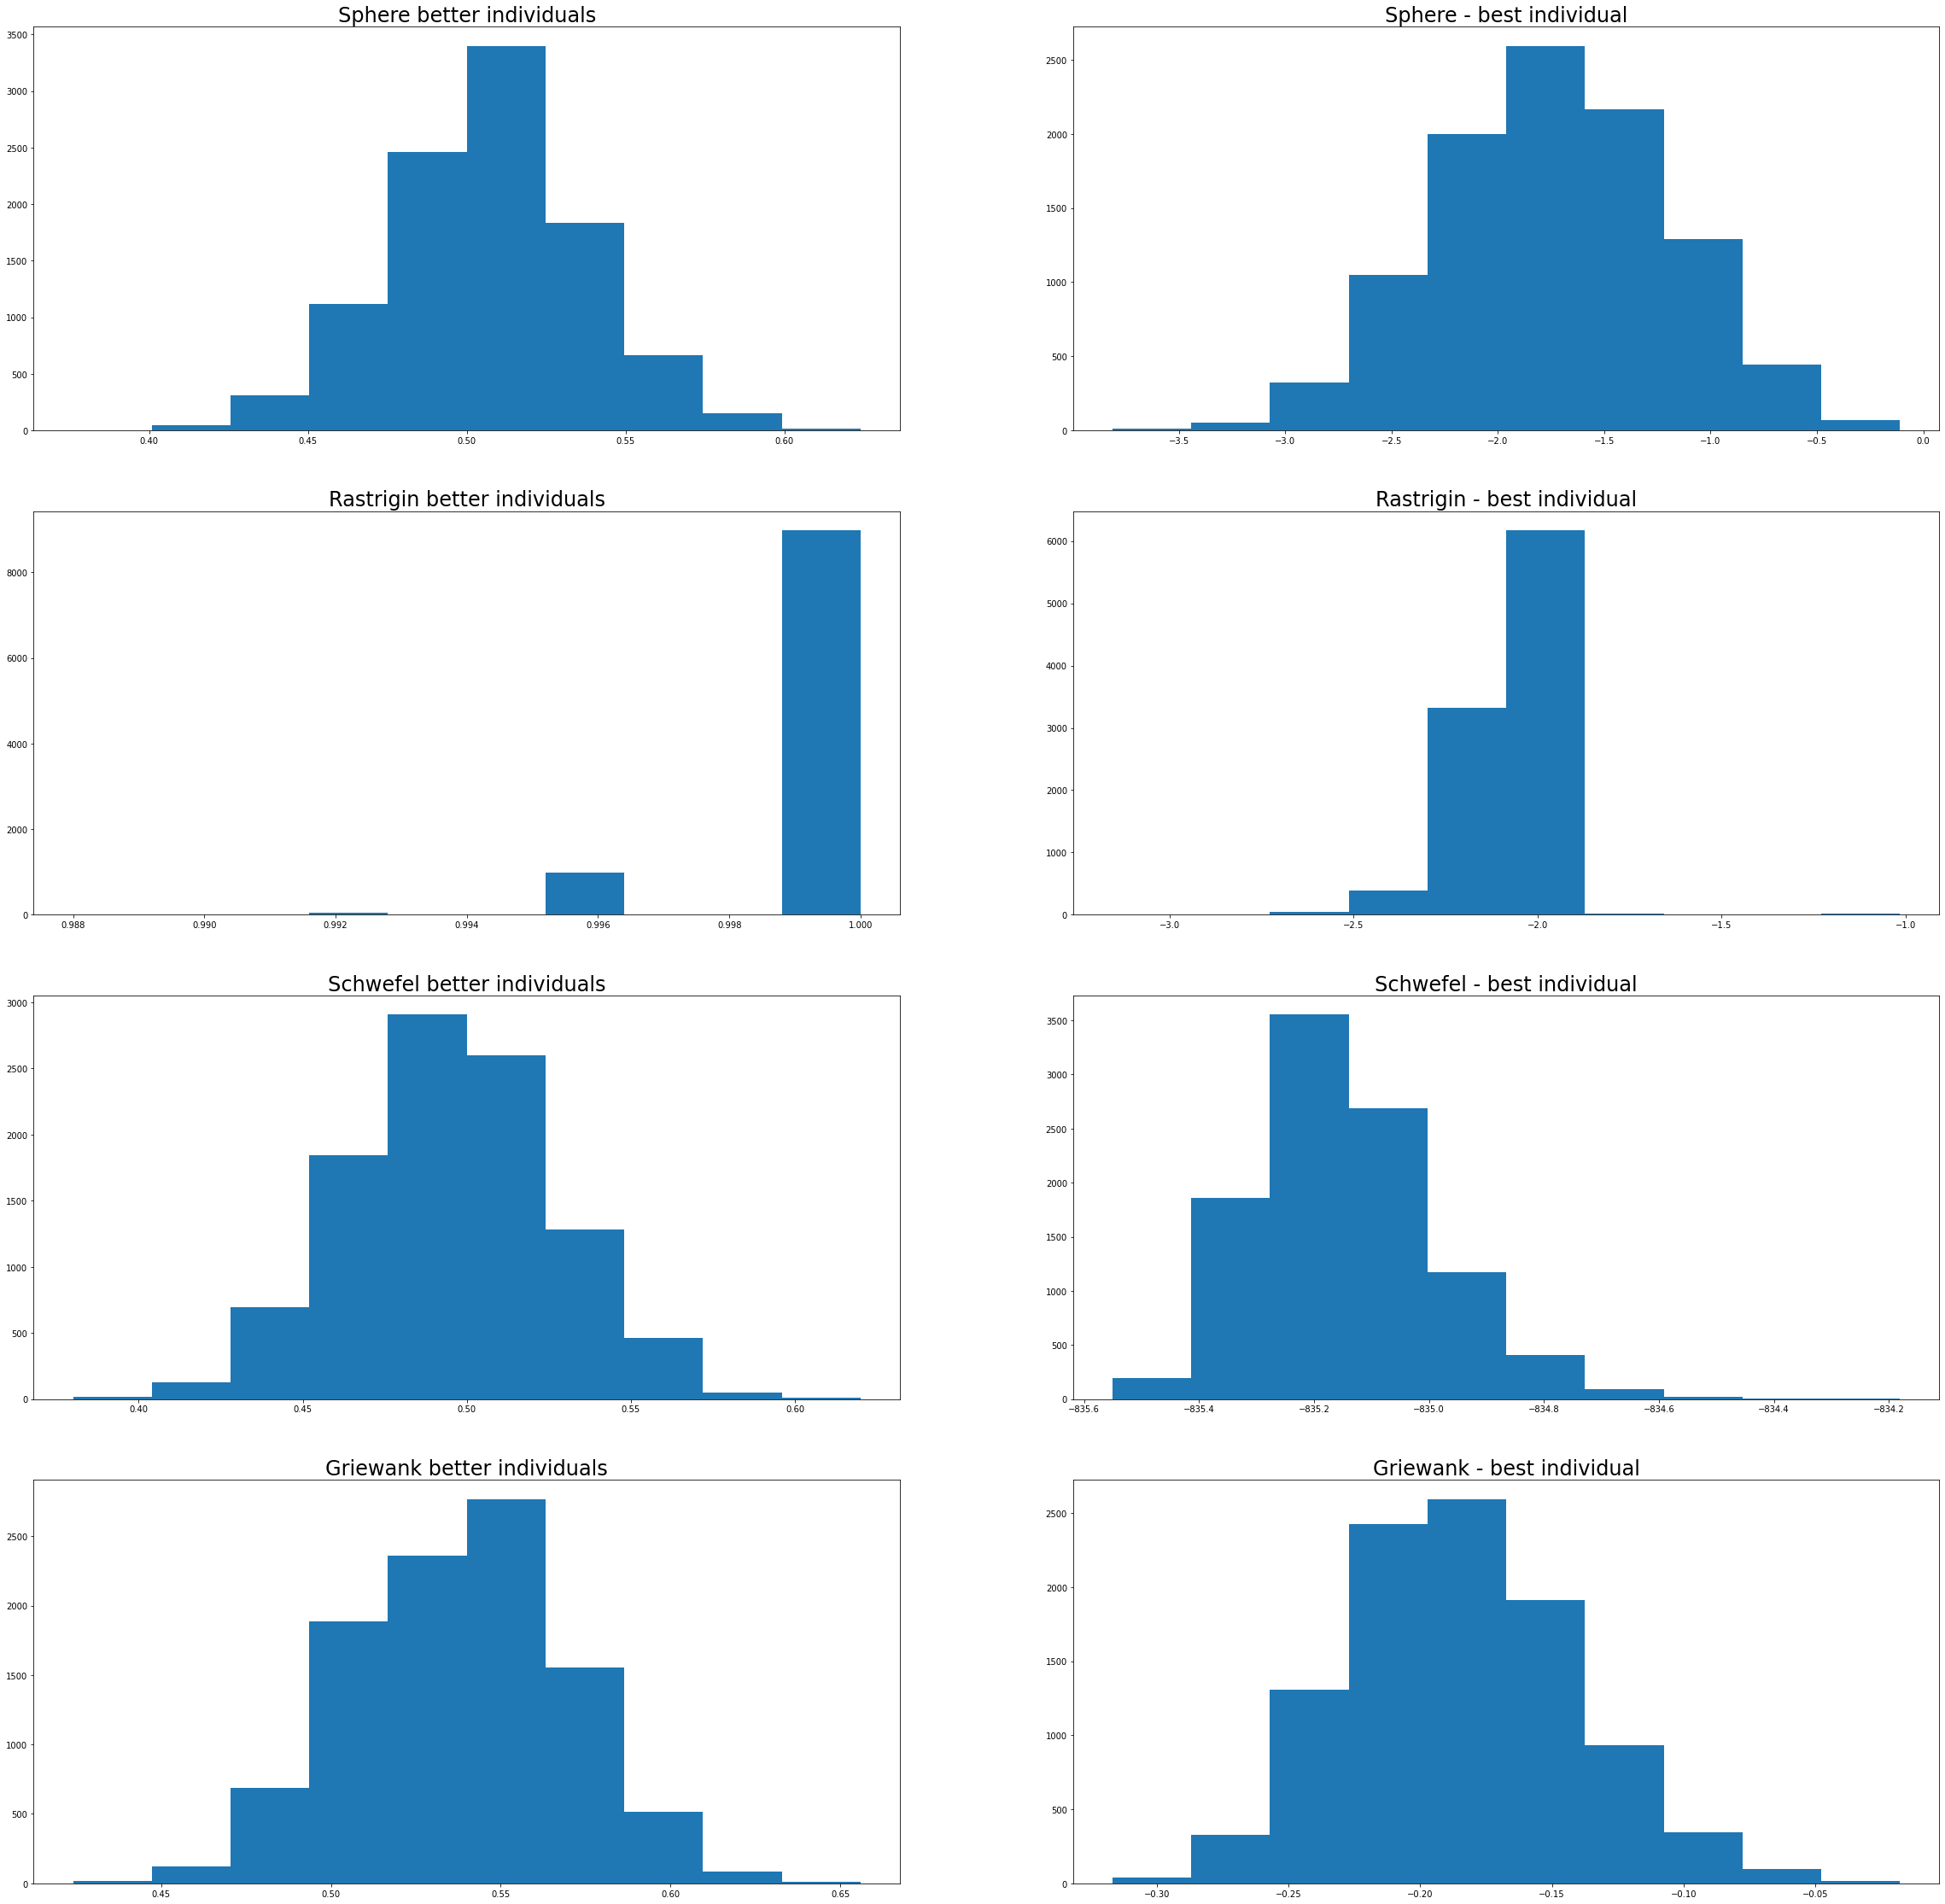

In [279]:
sigma = 0.25

fig, axs = plt.subplots(4, 2, figsize=(40,40))
labels = ["Sphere", "Rastrigin", "Schwefel", "Griewank"]
for j, f in enumerate([objective_function_F1a, objective_function_F6, objective_function_F7, objective_function_F8]):
    res = []
    best = []
    for i in range(10000):
        mutations = original_individual + sigma * np.random.randn(N, d)
        diff, bst = zad2a(mutations, f)
        res.append(diff)
        best.append(bst)
    axs[j, 0].hist(res)
    axs[j, 0].set_title(labels[j] + " better individuals", fontsize=24)
    axs[j, 1].hist(best)
    axs[j, 1].set_title(labels[j] + " - best individual", fontsize=24)
plt.show()

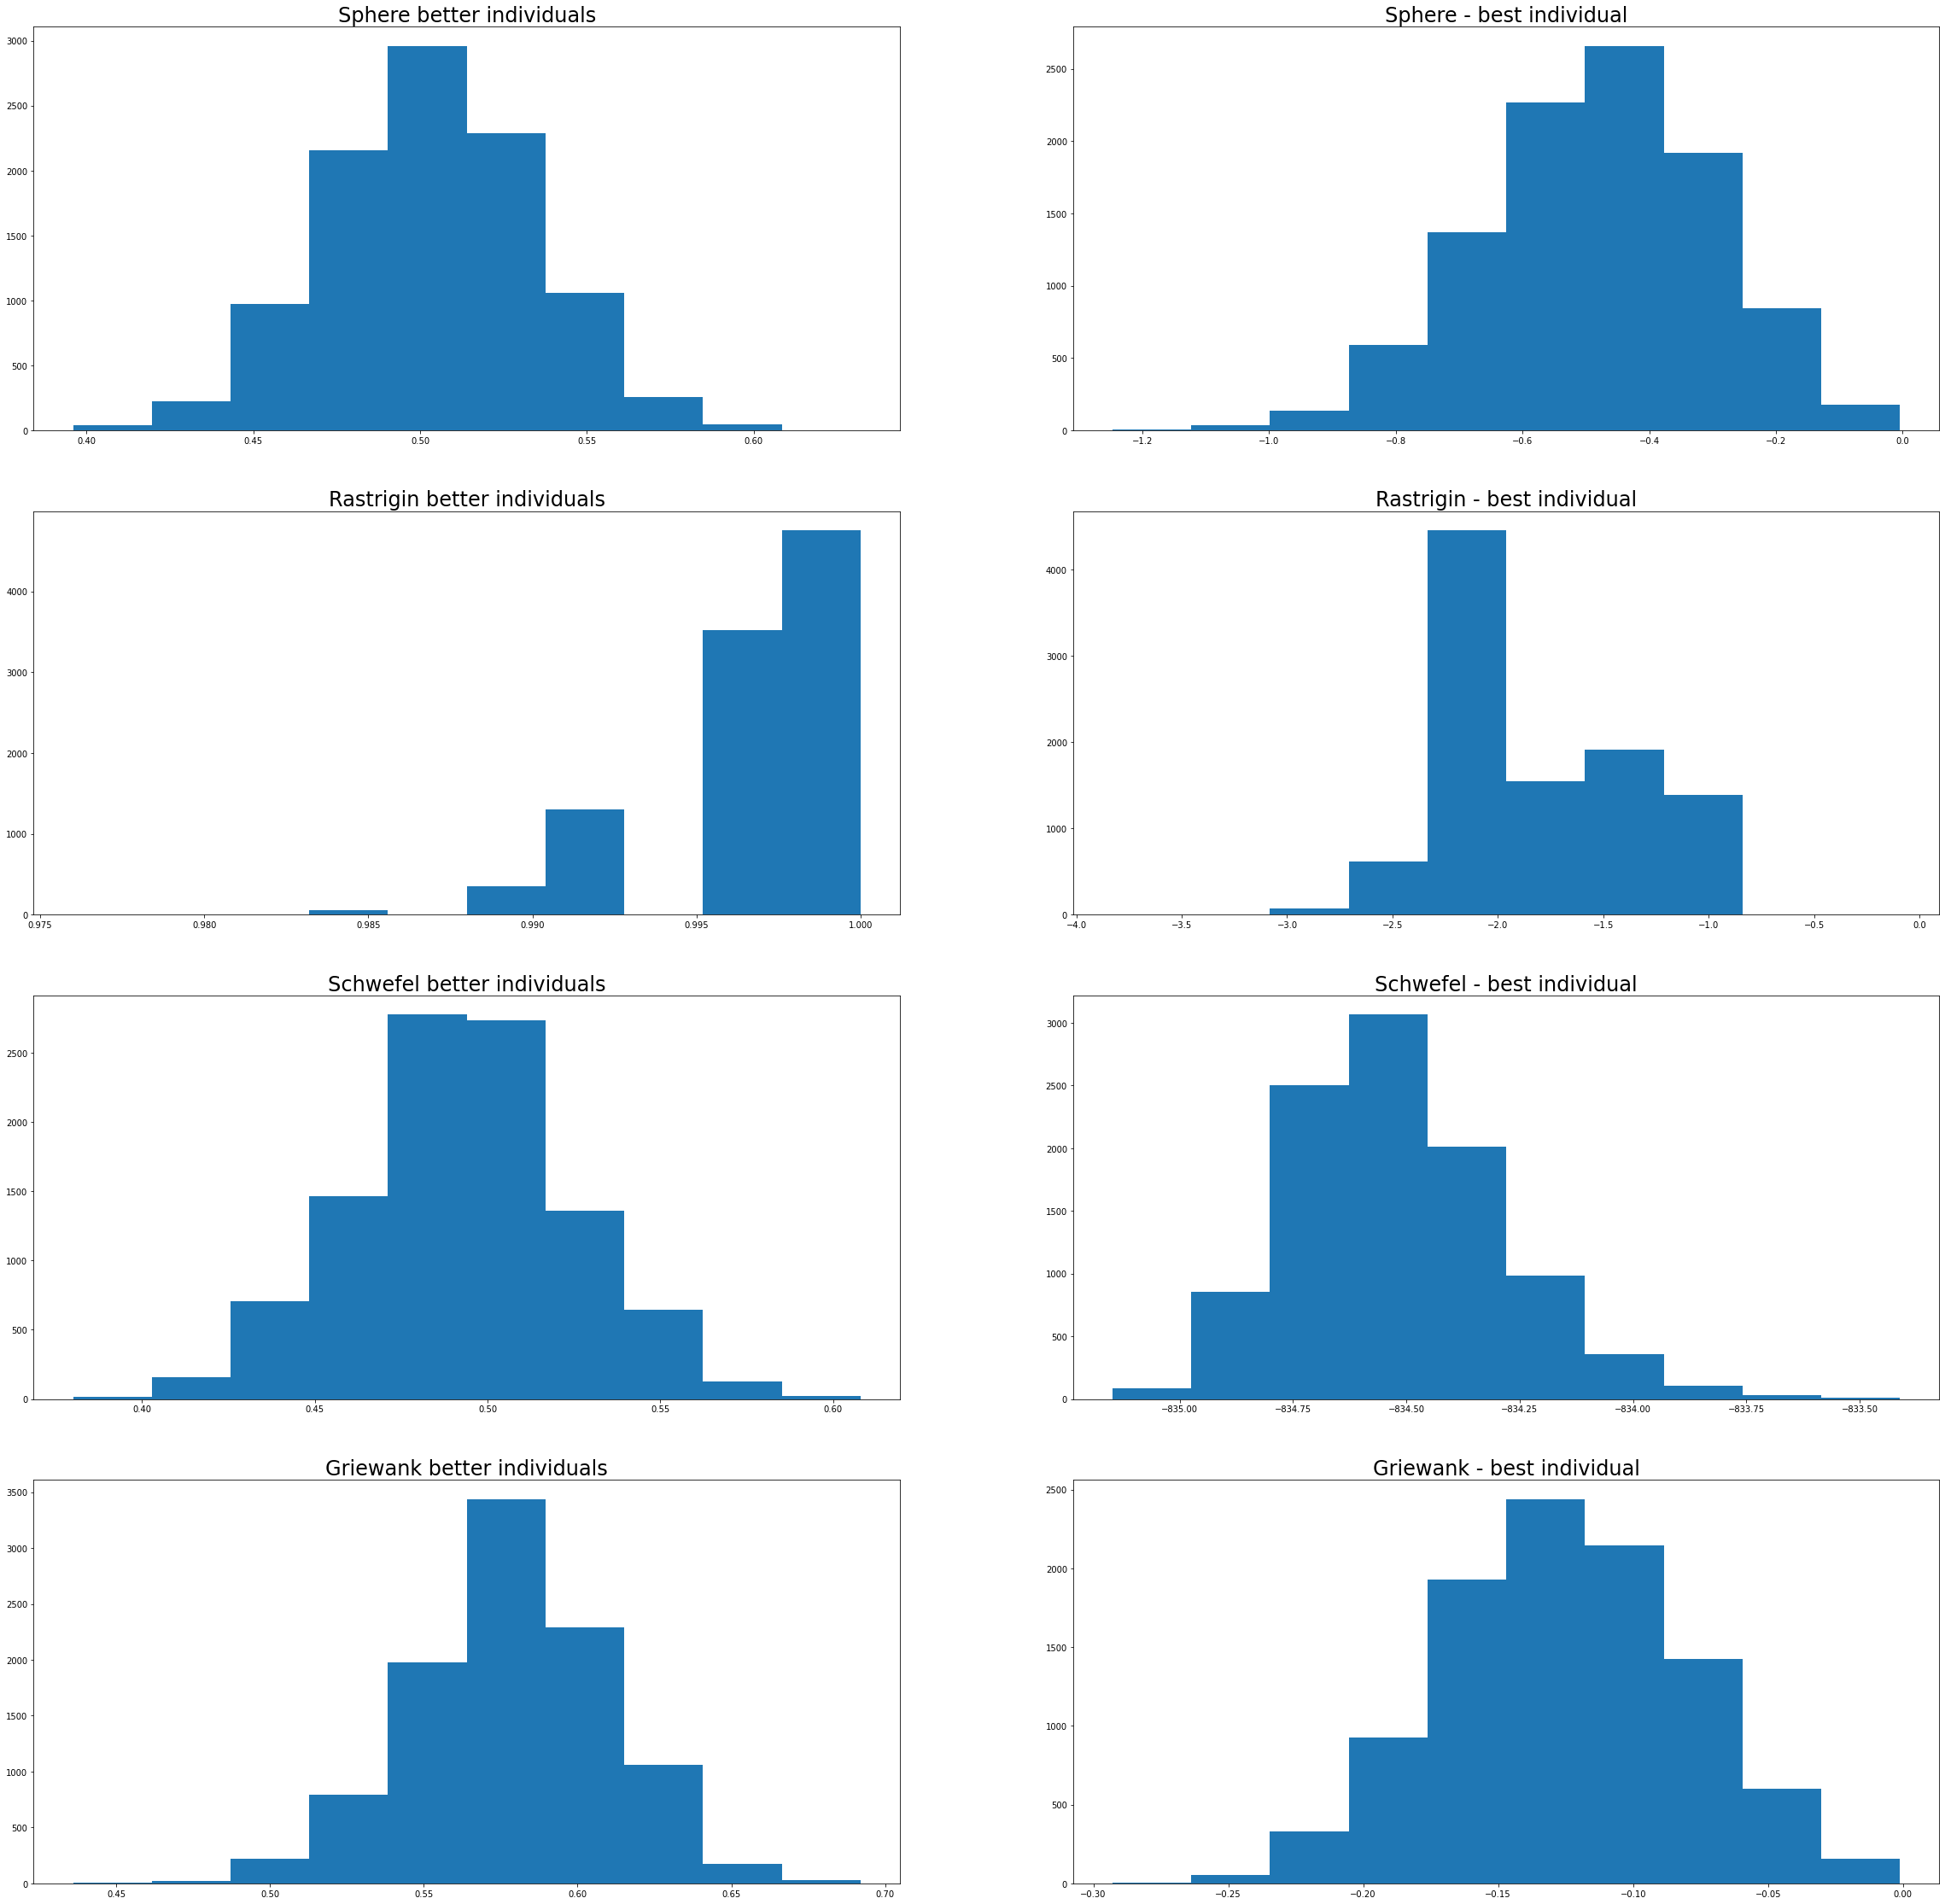

In [122]:
sigma = np.array([0.25, 0.5])
fig, axs = plt.subplots(4, 2, figsize=(40,40))
labels = ["Sphere", "Rastrigin", "Schwefel", "Griewank"]
for j, f in enumerate([objective_function_F1a, objective_function_F6, objective_function_F7, objective_function_F8]):
    res = []
    best = []
    for i in range(10000):
        mutations = original_individual + sigma * np.random.randn(N, d)
        diff, bst = zad2a(mutations, f)
        res.append(diff)
        best.append(bst)
    axs[j, 0].hist(res)
    axs[j, 0].set_title(labels[j] + " better individuals", fontsize=24)
    axs[j, 1].hist(best)
    axs[j, 1].set_title(labels[j] + " - best individual", fontsize=24)
plt.show()

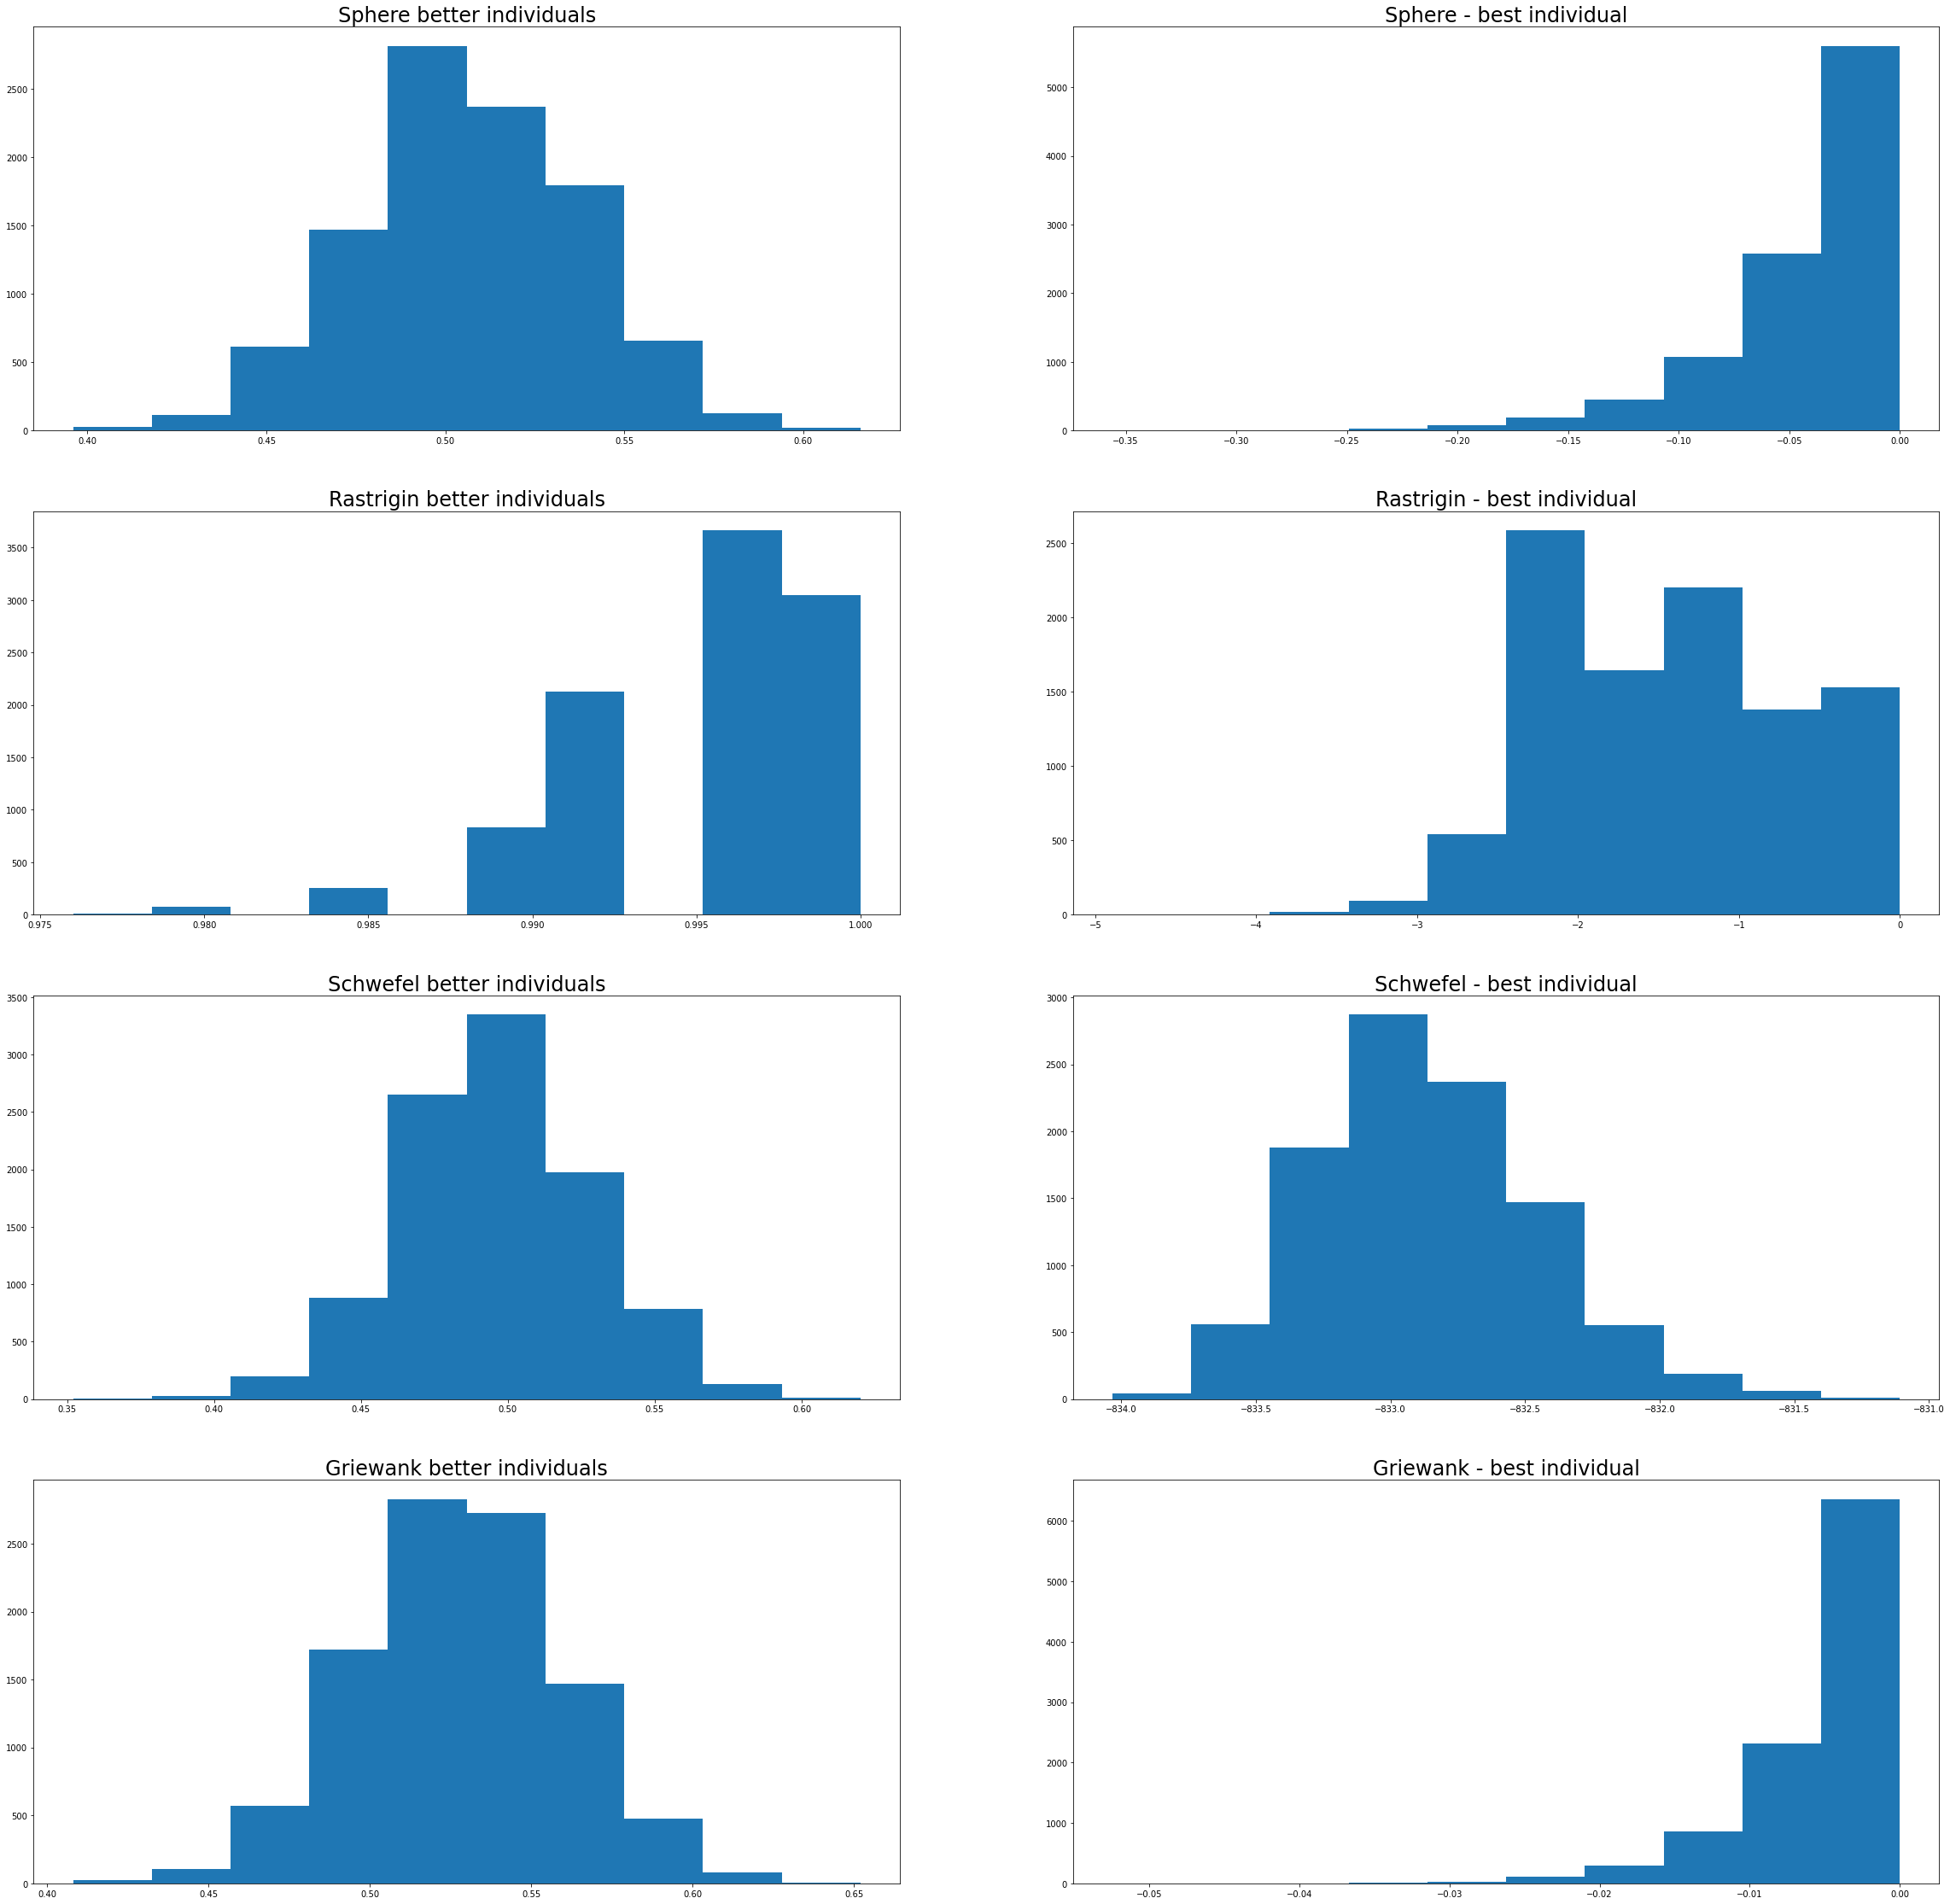

In [123]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
fig, axs = plt.subplots(4, 2, figsize=(40,40))
labels = ["Sphere", "Rastrigin", "Schwefel", "Griewank"]
for j, f in enumerate([objective_function_F1a, objective_function_F6, objective_function_F7, objective_function_F8]):
    res = []
    best = []
    for i in range(10000):
        mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
        diff, bst = zad2a(mutations, f)
        res.append(diff)
        best.append(bst)
    axs[j, 0].hist(res)
    axs[j, 0].set_title(labels[j] + " better individuals", fontsize=24)
    axs[j, 1].hist(best)
    axs[j, 1].set_title(labels[j] + " - best individual", fontsize=24)

plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [62]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

<ipython-input-63-02e15ab17f59>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().add_artist(el)


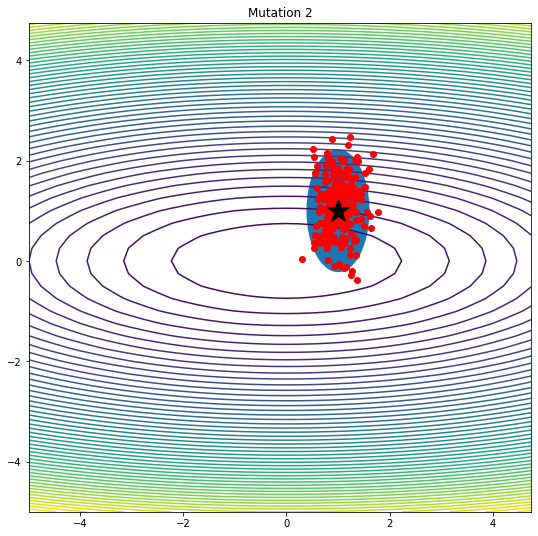

In [63]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
el = ellipse(original_individual[0], 2 * sigma[0] * np.sqrt(5.991), 2 * sigma[1] * np.sqrt(5.991))
plt.axes().add_artist(el)
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [116]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
N = 250
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)


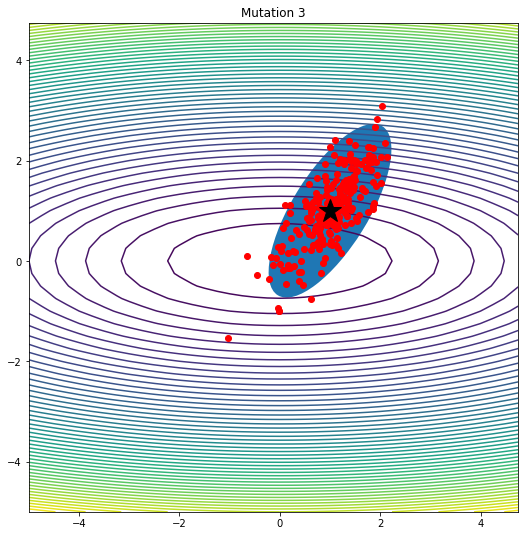

In [119]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])



plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
ax = plt.gca()
ax.set_aspect('equal')
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')

eva, eve = np.linalg.eig(S)
ew = 2 * np.sqrt(5.991 * eva[0])
eh = 2 * np.sqrt(5.991 * eva[1])
max_eve = eve[np.argmax(eva)]
angle = np.arctan(max_eve[0] / max_eve[1]) * (180 / np.pi)

el = ellipse(original_individual[0], ew, eh, angle)

ax.add_artist(el)
plt.show()

## Przykładowa strategia ewolucyjna

In [6]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=10,  mn=0, mx=np.inf):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = -np.inf

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    
    if mx != np.inf:
        current_population_solutions = 100 * np.random.rand(population_size, chromosome_length) - 50.0
    else:
        current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)

    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        
        if mx == np.inf:
            for i in range(number_of_offspring):
                children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
                children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)
        else:
            tmp_child = []
            tmp_sigmas = []
            while len(tmp_child) < number_of_offspring:
                for i in range(number_of_offspring):
                    nchild = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
                    wrong = False
                    for x in nchild:
                        if x < mn or x > mx:
                            wrong = True
                            break
                    if wrong:
                        continue
                    else:
                        tmp_child.append(nchild)
                        tmp_sigmas.append(current_population_sigmas[parent_indices[i, :], :].mean(axis=0))
                    if len(tmp_child) >= number_of_offspring:
                        break
            
            children_population_solutions = np.array(tmp_child)
            children_population_sigmas = np.array(tmp_sigmas)
        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))
    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -8117.36196661, mean score = -28033.32598926.
Iteration 0010 : best score = -35.44097093, mean score = -247.33219413.
Iteration 0020 : best score = -0.11692103, mean score = -0.63555120.
Iteration 0030 : best score = -0.00022618, mean score = -0.00169920.
Iteration 0040 : best score = -0.00000071, mean score = -0.00000391.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


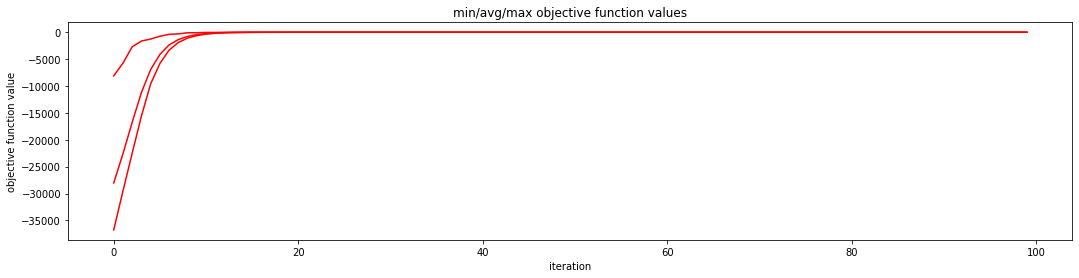

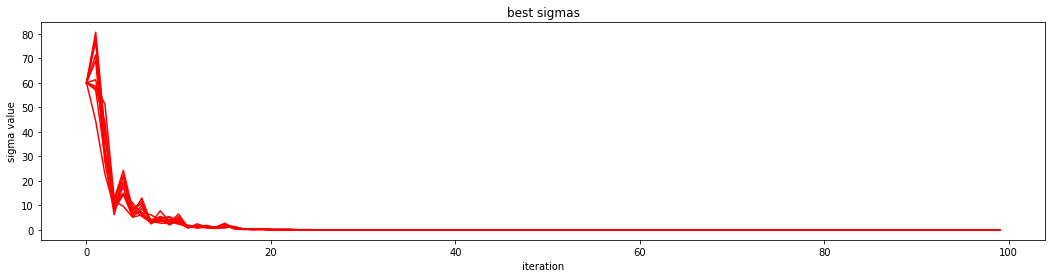

In [17]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=60.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=10)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -27479.60234569, mean score = -59420.14009190.
Iteration 0010 : best score = -891.75340209, mean score = -2371.51780964.
Iteration 0020 : best score = -24.34490143, mean score = -65.67254186.
Iteration 0030 : best score = -0.58244894, mean score = -1.60823097.
Iteration 0040 : best score = -0.01401119, mean score = -0.03846869.
Iteration 0050 : best score = -0.00043894, mean score = -0.00101459.
Iteration 0060 : best score = -0.00001289, mean score = -0.00003086.
Iteration 0070 : best score = -0.00000041, mean score = -0.00000100.
Iteration 0080 : best score = -0.00000001, mean score = -0.00000003.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


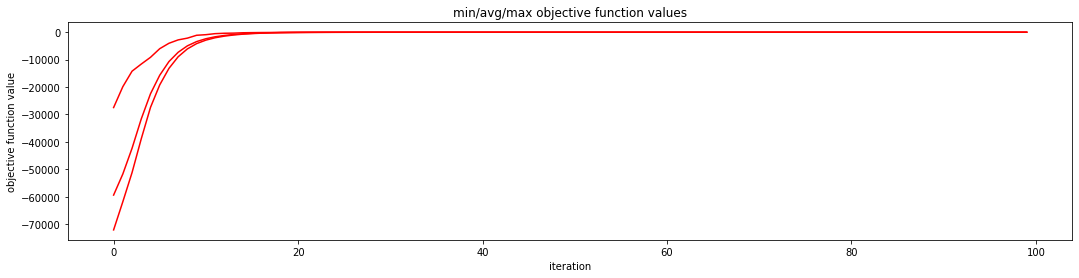

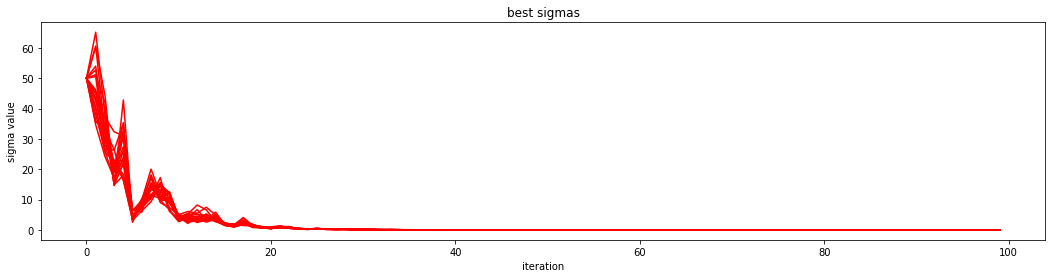

In [19]:
d = 20
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=50.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=10)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -89707.19610244, mean score = -161035.51207084.
Iteration 0010 : best score = -20634.07736021, mean score = -29170.97406427.
Iteration 0020 : best score = -3644.36825144, mean score = -5342.37685226.
Iteration 0030 : best score = -809.92063259, mean score = -1154.41396386.
Iteration 0040 : best score = -182.52912136, mean score = -257.81457282.
Iteration 0050 : best score = -43.20405171, mean score = -56.43589379.
Iteration 0060 : best score = -8.51579366, mean score = -12.90372429.
Iteration 0070 : best score = -2.31368585, mean score = -2.98097054.
Iteration 0080 : best score = -0.57192671, mean score = -0.77638415.
Iteration 0090 : best score = -0.13547923, mean score = -0.21041350.
Iteration 0100 : best score = -0.03245133, mean score = -0.05161544.
Iteration 0110 : best score = -0.00889810, mean score = -0.01248449.
Iteration 0120 : best score = -0.00196986, mean score = -0.00278234.
Iteration 0130 : best score = -0.00045968, mean score = -0.00064670.

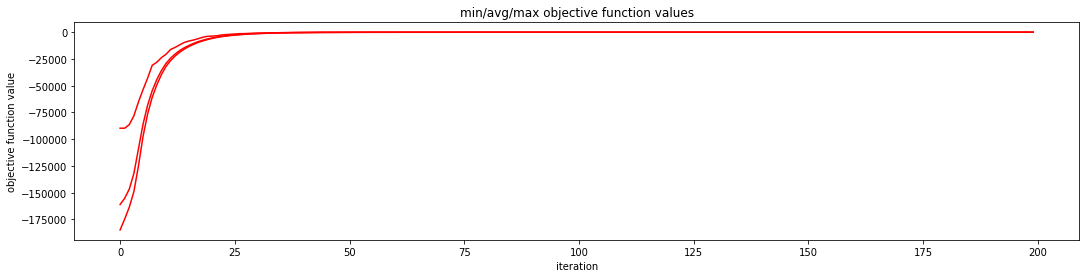

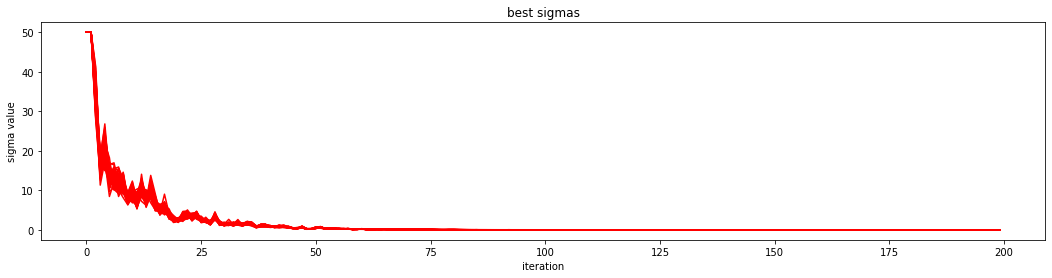

In [21]:
d = 50
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=50.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=10)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -216432.40717946, mean score = -273814.96309083.
Iteration 0010 : best score = -96433.59761552, mean score = -116337.20397681.
Iteration 0020 : best score = -41596.55378600, mean score = -49386.58051633.
Iteration 0030 : best score = -15585.25461311, mean score = -19581.60513629.
Iteration 0040 : best score = -5553.09497753, mean score = -7292.18009861.
Iteration 0050 : best score = -2173.50260429, mean score = -2652.02394394.
Iteration 0060 : best score = -789.53397073, mean score = -960.18241078.
Iteration 0070 : best score = -274.08515005, mean score = -346.34515751.
Iteration 0080 : best score = -100.43486111, mean score = -121.88521841.
Iteration 0090 : best score = -30.40548824, mean score = -41.45378274.
Iteration 0100 : best score = -10.56977601, mean score = -14.10421676.
Iteration 0110 : best score = -4.00046377, mean score = -4.86525911.
Iteration 0120 : best score = -1.40212112, mean score = -1.72504367.
Iteration 0130 : best score = -0.5136754

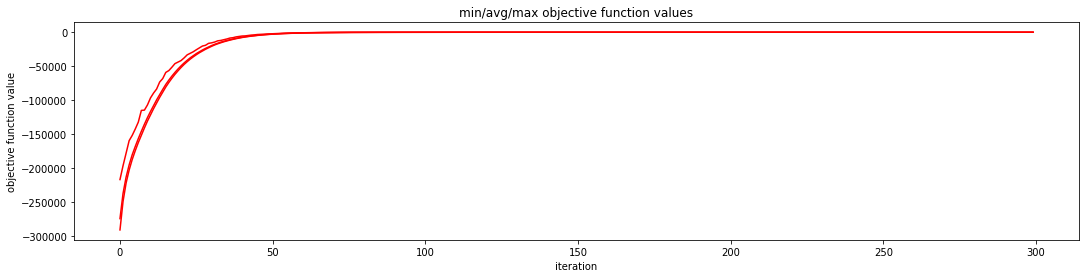

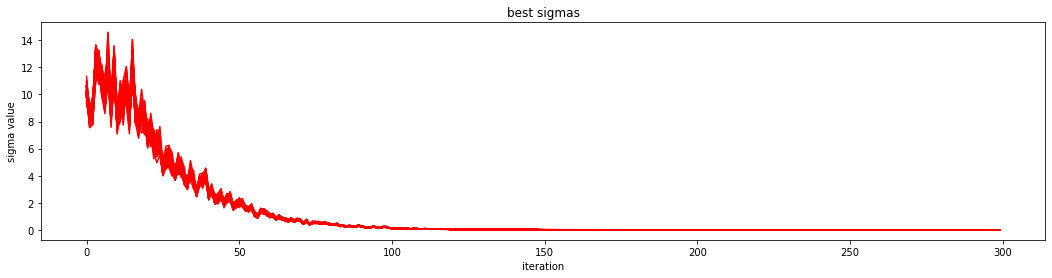

In [46]:
d = 100
N = 2000
T = 300

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=10.0, tau=1/np.sqrt(6*d), tau_0=1/np.sqrt(6*np.sqrt(d)), log_frequency=10)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -4854.70937028, mean score = -26744.33391584.
Iteration 0010 : best score = -209.90510210, mean score = -1079.39815144.
Iteration 0020 : best score = -48.70260806, mean score = -120.47925342.
Iteration 0030 : best score = -24.72554633, mean score = -76.57198444.
Iteration 0040 : best score = -22.05957687, mean score = -65.65688342.
Iteration 0050 : best score = -22.05957687, mean score = -60.25010351.
Iteration 0060 : best score = -17.26339044, mean score = -56.74562862.
Iteration 0070 : best score = -17.26339044, mean score = -54.27422789.
Iteration 0080 : best score = -17.26339044, mean score = -52.40113665.
Iteration 0090 : best score = -17.26339044, mean score = -50.86830743.
Iteration 0100 : best score = -17.26339044, mean score = -49.57087317.
Iteration 0110 : best score = -17.26339044, mean score = -48.43791477.
Iteration 0120 : best score = -17.26339044, mean score = -47.43771771.
Iteration 0130 : best score = -17.25787579, mean score = -46.5836756

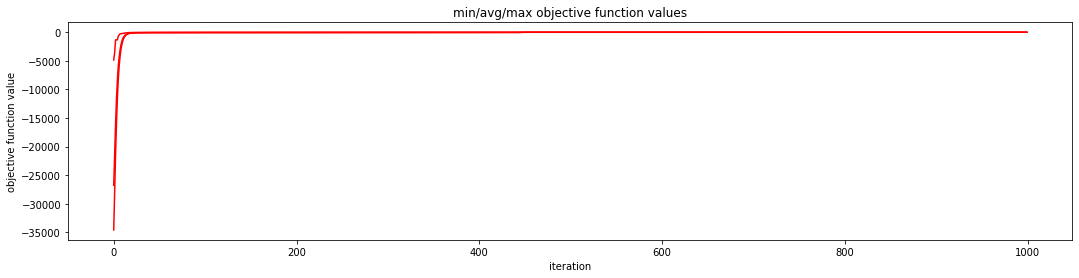

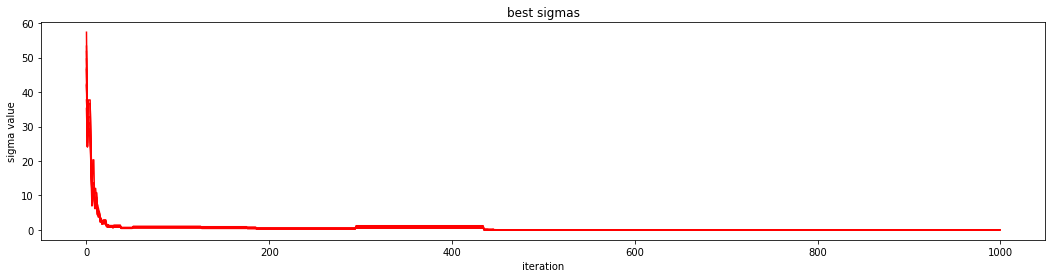

In [20]:
d = 10
N = 6000
T = 1000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=50.0, tau=1/np.sqrt(6*d), tau_0=1/np.sqrt(6*np.sqrt(d)), log_frequency=10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -19030.34992490, mean score = -60689.00141379.
Iteration 0010 : best score = -1369.11238104, mean score = -4947.66079876.
Iteration 0020 : best score = -172.87882571, mean score = -364.72082220.
Iteration 0030 : best score = -106.84678683, mean score = -183.91605681.
Iteration 0040 : best score = -92.98028982, mean score = -159.25519701.
Iteration 0050 : best score = -87.63392973, mean score = -148.87400740.
Iteration 0060 : best score = -76.35754423, mean score = -142.70092618.
Iteration 0070 : best score = -71.69085994, mean score = -138.27124833.
Iteration 0080 : best score = -71.69085994, mean score = -134.97034259.
Iteration 0090 : best score = -71.69085994, mean score = -132.36814726.
Iteration 0100 : best score = -71.69085994, mean score = -130.31010507.
Iteration 0110 : best score = -71.69085994, mean score = -128.56992269.
Iteration 0120 : best score = -71.69085994, mean score = -126.94986680.
Iteration 0130 : best score = -70.39803620, mean score

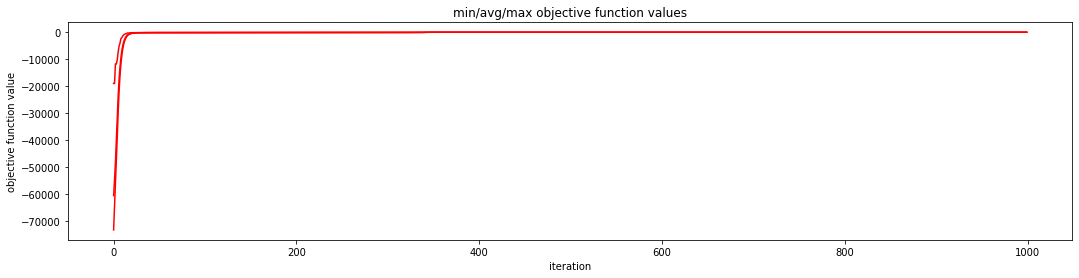

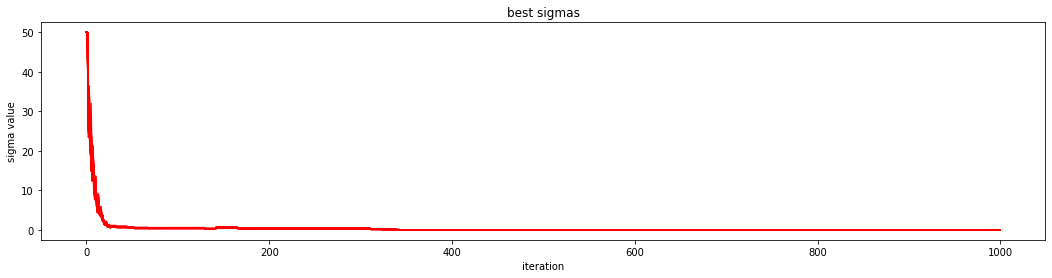

In [21]:
d = 20
N = 8000
T = 1000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=50.0, tau=1/np.sqrt(6*d), tau_0=1/np.sqrt(6*np.sqrt(d)), log_frequency=10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -86377.22284642, mean score = -161458.94707741.
Iteration 0010 : best score = -15007.18369512, mean score = -28596.62988665.
Iteration 0020 : best score = -3598.60606748, mean score = -5343.70103568.
Iteration 0030 : best score = -1038.66720554, mean score = -1504.74740778.
Iteration 0040 : best score = -517.49369423, mean score = -750.91956694.
Iteration 0050 : best score = -441.21467431, mean score = -586.58342069.
Iteration 0060 : best score = -393.07876800, mean score = -533.42984393.
Iteration 0070 : best score = -384.08816793, mean score = -507.17912626.
Iteration 0080 : best score = -357.59954092, mean score = -489.80982871.
Iteration 0090 : best score = -356.69810402, mean score = -475.40708153.
Iteration 0100 : best score = -162.26227875, mean score = -265.37142403.
Iteration 0110 : best score = -73.17258756, mean score = -90.07287361.
Iteration 0120 : best score = -55.70394975, mean score = -59.10791335.
Iteration 0130 : best score = -50.50516732

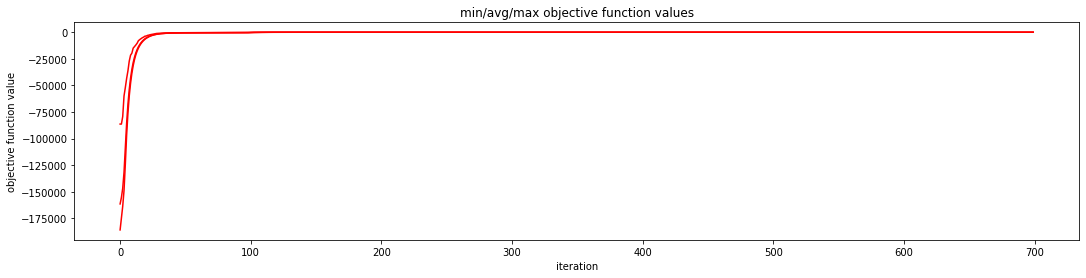

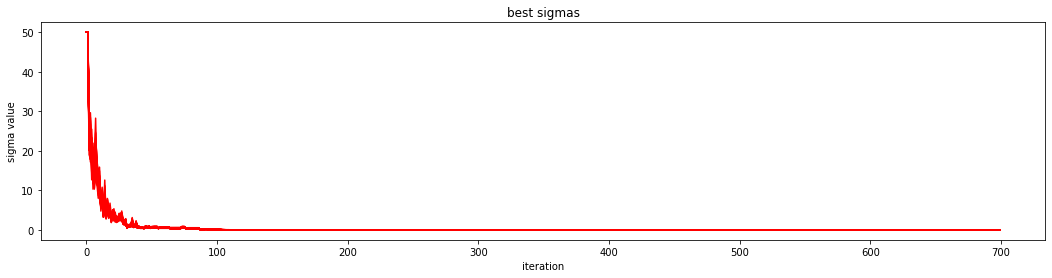

In [13]:
d = 50
N = 50000
T = 700

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=50.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -220530.95640407, mean score = -332859.56089908.
Iteration 0010 : best score = -161726.48135561, mean score = -306617.54973495.
Iteration 0020 : best score = -42057.32542191, mean score = -62877.56451430.
Iteration 0030 : best score = -9413.79582113, mean score = -14538.85933831.
Iteration 0040 : best score = -3407.34416396, mean score = -4554.60087307.
Iteration 0050 : best score = -1619.70892599, mean score = -2058.86960850.
Iteration 0060 : best score = -1123.46649952, mean score = -1391.52639765.
Iteration 0070 : best score = -989.13660573, mean score = -1187.83228899.
Iteration 0080 : best score = -902.19556293, mean score = -1105.15316998.
Iteration 0090 : best score = -844.81176961, mean score = -1061.72230897.
Iteration 0100 : best score = -817.06430010, mean score = -1034.00126399.
Iteration 0110 : best score = -817.06430010, mean score = -1014.08815772.
Iteration 0120 : best score = -798.13322675, mean score = -999.00446628.
Iteration 0130 : best

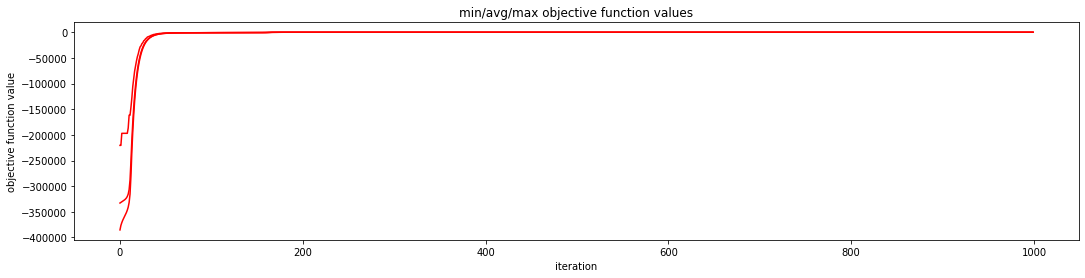

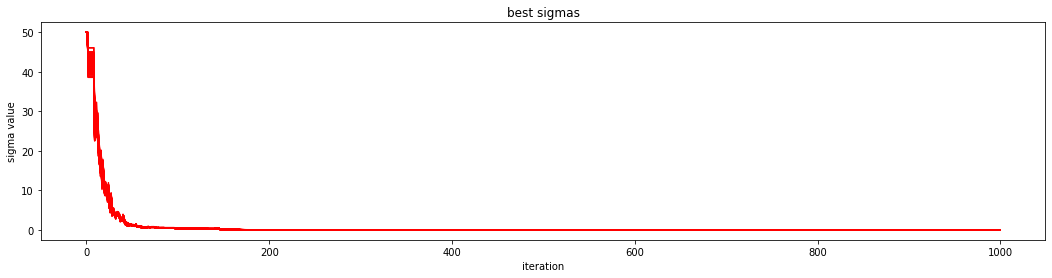

In [14]:
d = 100
N = 50000
T = 1000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=50.0, tau=1/np.sqrt(6*d), tau_0=1/np.sqrt(6*np.sqrt(d)), log_frequency=10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Schwefel F7

Iteration 0000 : best score = -2174.30619059, mean score = -4170.60604821.
Iteration 0100 : best score = -1931.50879438, mean score = -3210.21213198.
Iteration 0200 : best score = -1703.84081776, mean score = -2848.28154765.
Iteration 0300 : best score = -1649.73377481, mean score = -2697.03827507.
Iteration 0400 : best score = -1649.73377481, mean score = -2587.35456991.
Iteration 0500 : best score = -1588.66395881, mean score = -2511.23368481.
Iteration 0600 : best score = -1588.66395881, mean score = -2442.18351995.
Iteration 0700 : best score = -1588.66395881, mean score = -2382.03707650.
Iteration 0800 : best score = -1435.20419082, mean score = -2319.12329390.
Iteration 0900 : best score = -1193.68830936, mean score = -2253.80656748.
Iteration 1000 : best score = -1150.97026438, mean score = -2185.92050775.
Iteration 1100 : best score = -1150.97026438, mean score = -2113.12797841.
Iteration 1200 : best score = -1109.09358740, mean score = -2018.48998115.
Iteration 1300 : best sco

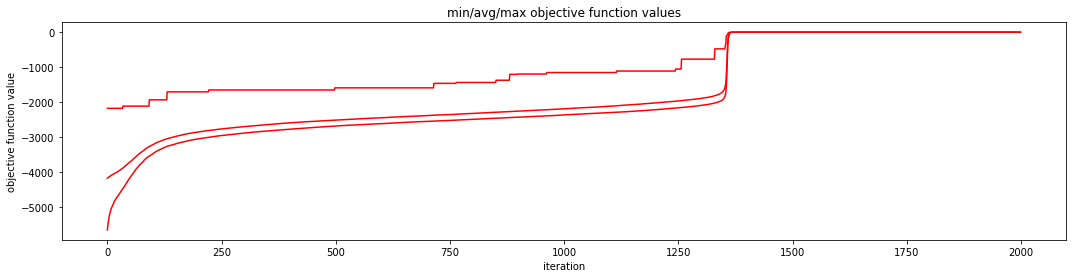

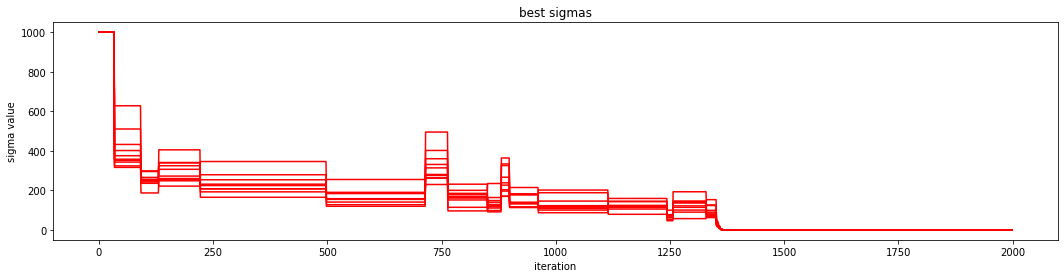

In [427]:
d = 10
N = 2000
T = 2000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 10, 1000.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 100, -500, 500)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -5135.38118552, mean score = -7622.76935862.
Iteration 0100 : best score = -4856.62719130, mean score = -6487.27014191.
Iteration 0200 : best score = -4856.62719130, mean score = -6299.20122282.
Iteration 0300 : best score = -4856.62719130, mean score = -6184.60267703.
Iteration 0400 : best score = -4704.72542626, mean score = -6103.07193637.
Iteration 0500 : best score = -4704.72542626, mean score = -6033.36505482.
Iteration 0600 : best score = -4585.83747722, mean score = -5975.66713946.
Iteration 0700 : best score = -4585.83747722, mean score = -5928.79362321.
Iteration 0800 : best score = -4585.83747722, mean score = -5884.37315999.
Iteration 0900 : best score = -4568.27221719, mean score = -5844.77195878.
Iteration 1000 : best score = -4568.27221719, mean score = -5809.96770804.
Iteration 1100 : best score = -4494.65330473, mean score = -5776.11302563.
Iteration 1200 : best score = -4494.65330473, mean score = -5745.94776839.
Iteration 1300 : best sco

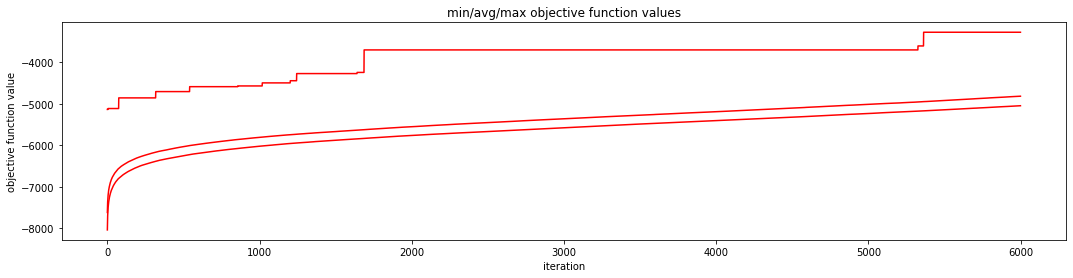

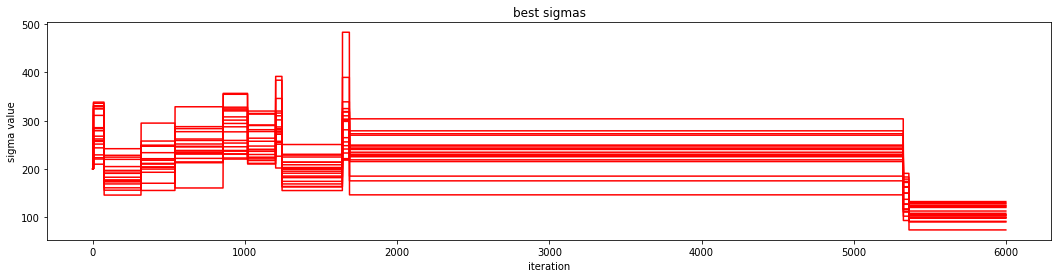

In [431]:
d = 20
N = 8000
T = 6000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 4*N, 100, 200.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 100, -500, 500)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -16711.43746147, mean score = -20273.02164726.
Iteration 0100 : best score = -16263.14956751, mean score = -18357.98985091.
Iteration 0200 : best score = -15509.49058932, mean score = -18112.82697806.
Iteration 0300 : best score = -15509.49058932, mean score = -17971.18901893.
Iteration 0400 : best score = -15509.49058932, mean score = -17869.58066752.
Iteration 0500 : best score = -15386.90104413, mean score = -17788.24623218.
Iteration 0600 : best score = -15386.90104413, mean score = -17728.87055337.
Iteration 0700 : best score = -15386.90104413, mean score = -17676.38660871.
Iteration 0800 : best score = -15386.90104413, mean score = -17629.14373396.
Iteration 0900 : best score = -15386.90104413, mean score = -17585.95559188.
Iteration 1000 : best score = -15386.90104413, mean score = -17548.86259617.
Iteration 1100 : best score = -15386.90104413, mean score = -17513.05043092.
Iteration 1200 : best score = -15386.90104413, mean score = -17482.14388422.

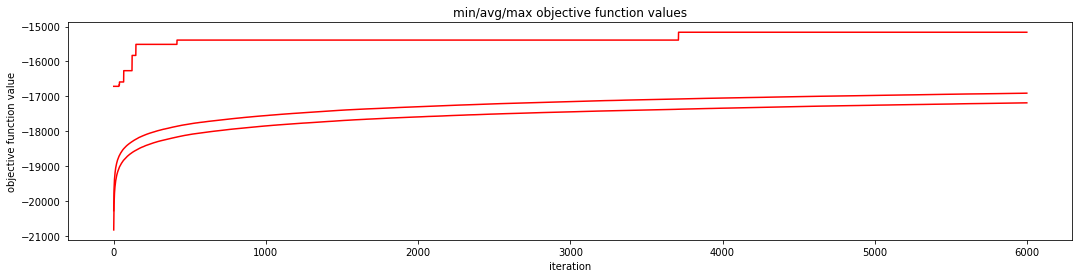

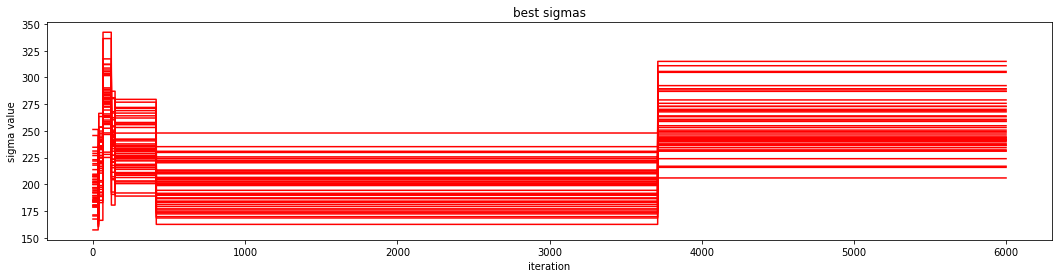

In [22]:
d = 50
N = 6000
T = 6000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 4*N, 100, 200.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 100, -500, 500)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -37981.65927100, mean score = -40966.43141465.
Iteration 0100 : best score = -35240.69256168, mean score = -38512.18026870.
Iteration 0200 : best score = -35240.69256168, mean score = -38205.69487428.
Iteration 0300 : best score = -35240.69256168, mean score = -38043.06579871.
Iteration 0400 : best score = -35229.51418218, mean score = -37918.60503076.
Iteration 0500 : best score = -34759.98629139, mean score = -37825.84737921.
Iteration 0600 : best score = -34476.32371535, mean score = -37747.15123488.
Iteration 0700 : best score = -34476.32371535, mean score = -37685.68441331.
Iteration 0800 : best score = -34476.32371535, mean score = -37631.83629612.
Iteration 0900 : best score = -34476.32371535, mean score = -37581.63361170.
Iteration 1000 : best score = -34476.32371535, mean score = -37541.02892359.
Iteration 1100 : best score = -34476.32371535, mean score = -37504.65692309.
Iteration 1200 : best score = -34476.32371535, mean score = -37470.20574712.

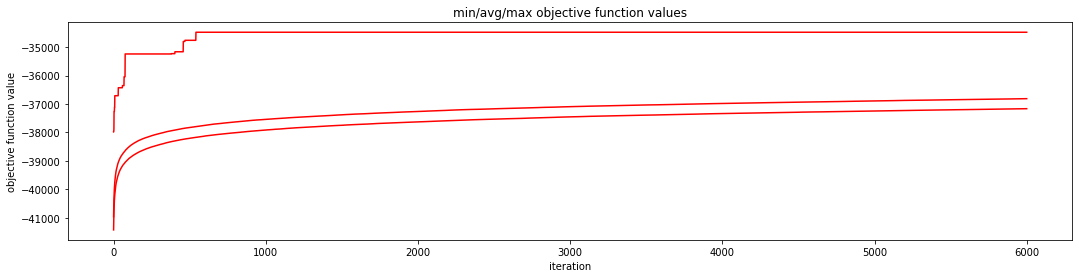

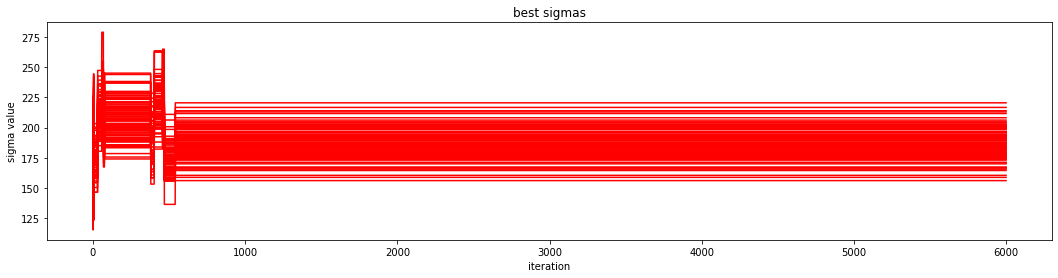

In [25]:
d = 100
N = 6000
T = 6000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 4*N, 100, 100.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 100, -500, 500)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -2.20590476, mean score = -7.54202603.
Iteration 0010 : best score = -0.73428082, mean score = -1.04819453.
Iteration 0020 : best score = -0.01750192, mean score = -0.36486412.
Iteration 0030 : best score = -0.00024867, mean score = -0.00133111.
Iteration 0040 : best score = -0.00000088, mean score = -0.00000569.
Iteration 0050 : best score = -0.00000001, mean score = -0.00000003.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0100 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0110 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0120 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0130 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0140 : best score = 0.00000000, mea

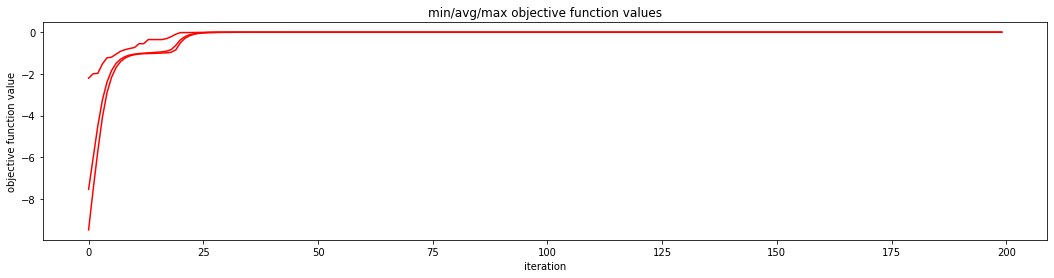

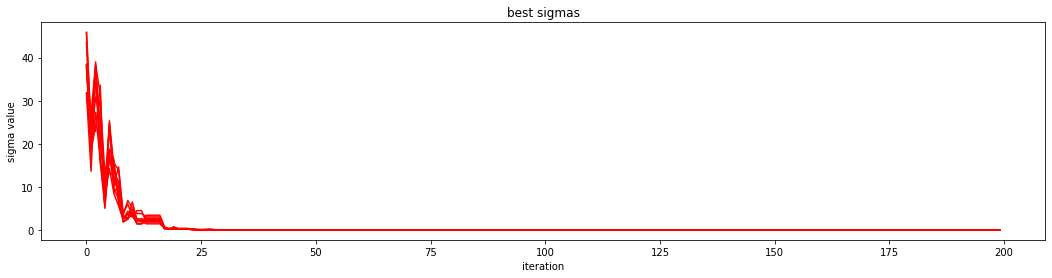

In [290]:
d = 10
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -8.87656887, mean score = -16.92768659.
Iteration 0010 : best score = -1.30597599, mean score = -1.85208767.
Iteration 0020 : best score = -0.86619605, mean score = -1.01503512.
Iteration 0030 : best score = -0.06041917, mean score = -0.12622744.
Iteration 0040 : best score = -0.00574495, mean score = -0.01065190.
Iteration 0050 : best score = -0.00057971, mean score = -0.00113838.
Iteration 0060 : best score = -0.00004215, mean score = -0.00008781.
Iteration 0070 : best score = -0.00000319, mean score = -0.00000651.
Iteration 0080 : best score = -0.00000023, mean score = -0.00000044.
Iteration 0090 : best score = -0.00000001, mean score = -0.00000002.
Iteration 0100 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0110 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0120 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0130 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0140 : best score = -0.

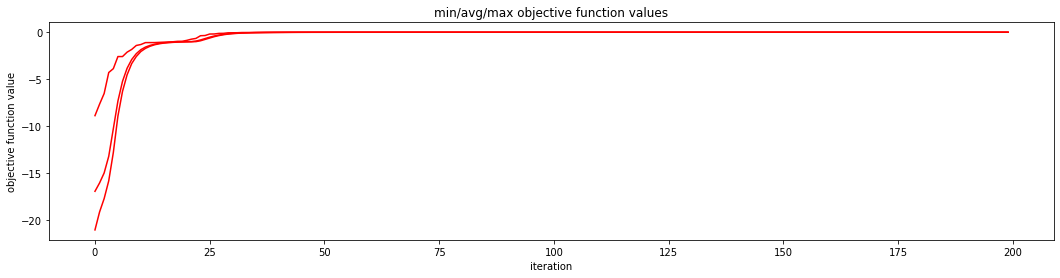

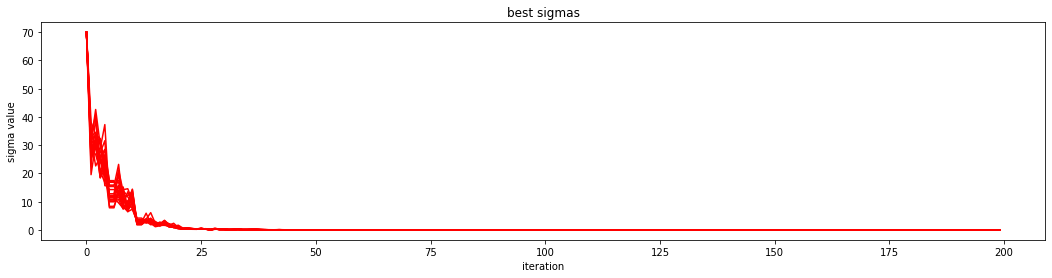

In [178]:
d = 20
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 70.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -26.70483708, mean score = -41.19269646.
Iteration 0010 : best score = -5.45375827, mean score = -8.31782388.
Iteration 0020 : best score = -1.96510048, mean score = -2.33772076.
Iteration 0030 : best score = -1.21082824, mean score = -1.29799423.
Iteration 0040 : best score = -1.04437189, mean score = -1.06594747.
Iteration 0050 : best score = -0.74909144, mean score = -0.85348569.
Iteration 0060 : best score = -0.36053470, mean score = -0.42953051.
Iteration 0070 : best score = -0.19360753, mean score = -0.22958039.
Iteration 0080 : best score = -0.11010874, mean score = -0.12964536.
Iteration 0090 : best score = -0.06453892, mean score = -0.07341859.
Iteration 0100 : best score = -0.03579365, mean score = -0.04058782.
Iteration 0110 : best score = -0.02060280, mean score = -0.02382318.
Iteration 0120 : best score = -0.01179517, mean score = -0.01360423.
Iteration 0130 : best score = -0.00582892, mean score = -0.00704979.
Iteration 0140 : best score = -0

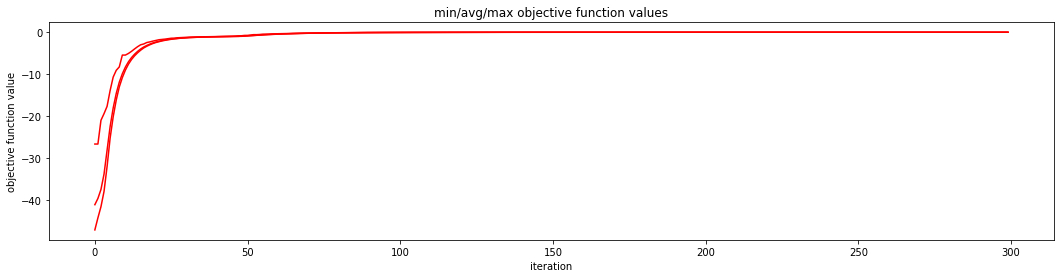

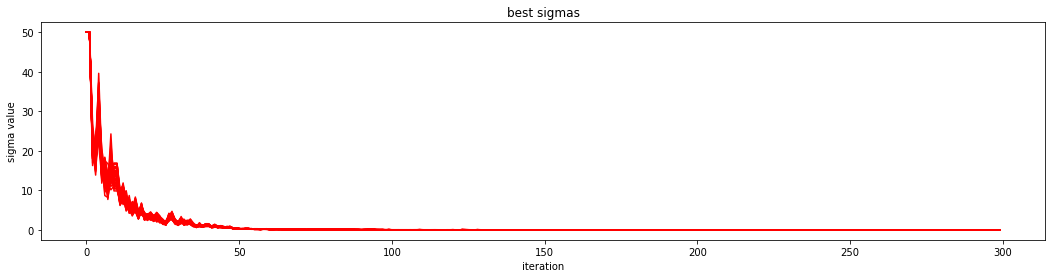

In [28]:
d = 50
N = 2000
T = 300

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -62.12047245, mean score = -83.29107627.
Iteration 0010 : best score = -25.16463547, mean score = -31.63613961.
Iteration 0020 : best score = -10.52014105, mean score = -12.33032608.
Iteration 0030 : best score = -5.36356699, mean score = -6.30634306.
Iteration 0040 : best score = -3.05478515, mean score = -3.50731898.
Iteration 0050 : best score = -1.98003902, mean score = -2.18219181.
Iteration 0060 : best score = -1.47137445, mean score = -1.55737576.
Iteration 0070 : best score = -1.23428983, mean score = -1.27707678.
Iteration 0080 : best score = -1.11644363, mean score = -1.13474316.
Iteration 0090 : best score = -1.04476248, mean score = -1.06615042.
Iteration 0100 : best score = -0.84459243, mean score = -0.90770201.
Iteration 0110 : best score = -0.64400286, mean score = -0.69390897.
Iteration 0120 : best score = -0.50078005, mean score = -0.53036260.
Iteration 0130 : best score = -0.38745813, mean score = -0.41475661.
Iteration 0140 : best score 

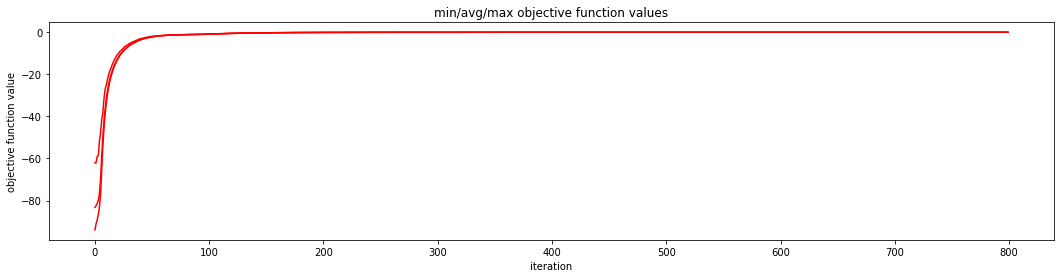

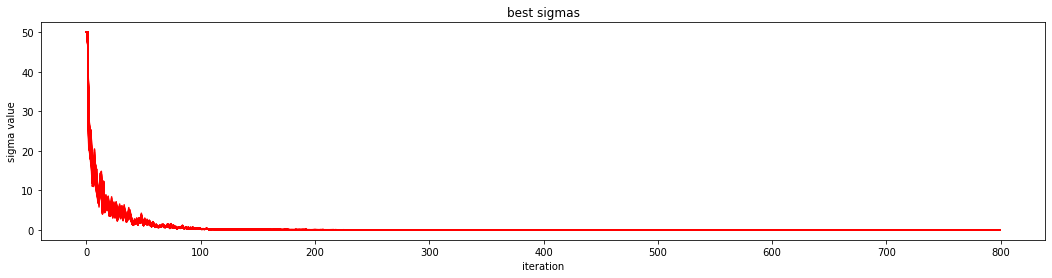

In [33]:
d = 100
N = 2000
T = 800

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

## zad4

In [401]:
def plot_result(A, angles, I, finish):
    res = [A]
    current_a = 0.0
    for a, i in zip(angles, I):
        end = (res[-1][0] + i * np.cos(current_a + a), res[-1][1] + i * np.sin(current_a + a))
        current_a += a
        plt.plot([res[-1][0], end[0]], [res[-1][1], end[1]])
        res.append(end)
    artist1 = plt.Circle((finish[0], finish[1]), 0.1, color='g')
    artist2 = plt.Circle((A[0], A[1]), 0.1, color='r')
    ax = plt.gca()
    ax.grid(False)
    ax.set_aspect('equal')
    ax.add_artist(artist1)
    ax.add_artist(artist2)
    plt.show()

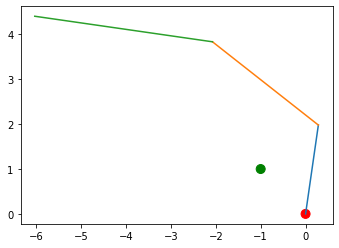

In [403]:
I = [2, 3, 4]
angles = [np.pi/2.2, np.pi/3, np.pi/6]
plot_result([0.0, 0.0], angles, I, (-1, 1))

In [352]:
def kinematics_cost_function(data, point):
    def aux(angles):
        (start, arms) = data
        endpoint = start.copy()
        new_angles = np.zeros((angles.shape[0], 1))
        for i in range(angles.shape[1]):
            new_angles += angles[:, i, np.newaxis]
            vec = np.hstack([np.cos(new_angles), 
                             np.sin(new_angles)]) * arms[i]
            endpoint = endpoint + vec
        s = np.sum((endpoint - point) ** 2, axis=1)
        return -s
    return aux

Iteration 0000 : best score = -0.01197812, mean score = -7.90126625.
Iteration 0010 : best score = -0.00000280, mean score = -0.52750794.
Iteration 0020 : best score = -0.00000280, mean score = -0.07332190.
Iteration 0030 : best score = -0.00000005, mean score = -0.00016859.
Iteration 0040 : best score = -0.00000000, mean score = -0.00000035.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


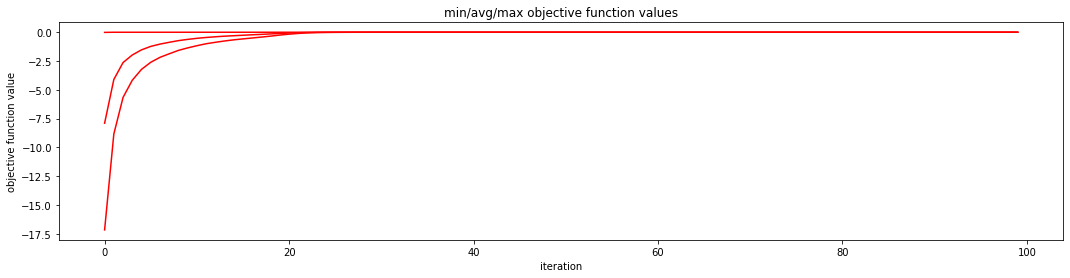

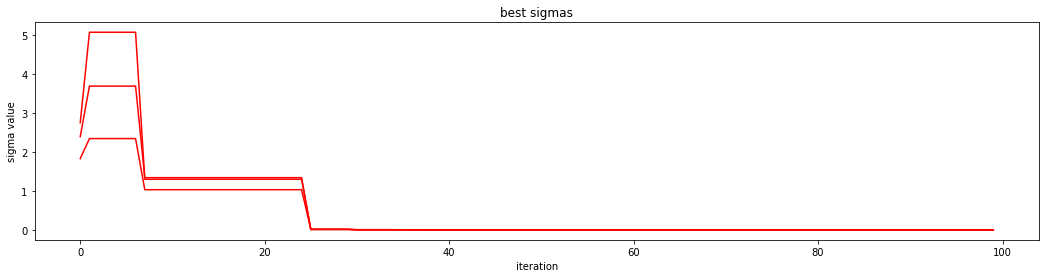

In [404]:
d = 3
N = 2000
T = 100
I = np.array([3.0, 3.0, 3.0])
S = np.array([[0.0, 0.0]])
F = np.array([[3.0, 0.0]])

kinematic_function = kinematics_cost_function((S, I), F)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    kinematic_function, d, N, T, 2*N, 2, np.pi/2, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -np.pi, np.pi)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

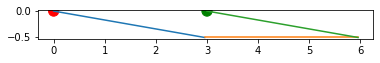

In [405]:
plot_result(S[0], best_chromosome, I, F[0])

Iteration 0000 : best score = -0.00873152, mean score = -37.20163148.
Iteration 0010 : best score = -0.00097390, mean score = -2.15882880.
Iteration 0020 : best score = -0.00001557, mean score = -0.11175274.
Iteration 0030 : best score = -0.00000028, mean score = -0.00014616.
Iteration 0040 : best score = -0.00000000, mean score = -0.00000023.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


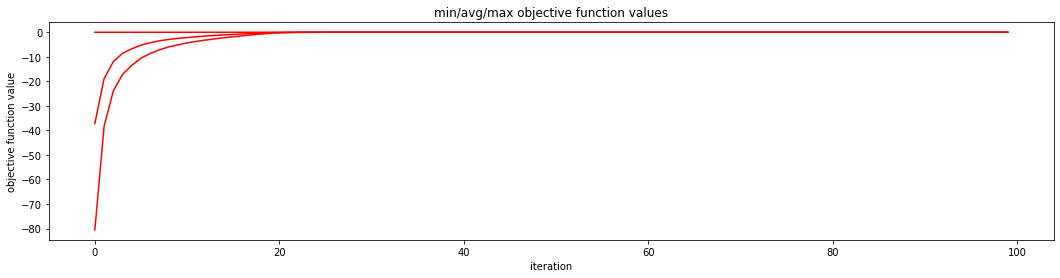

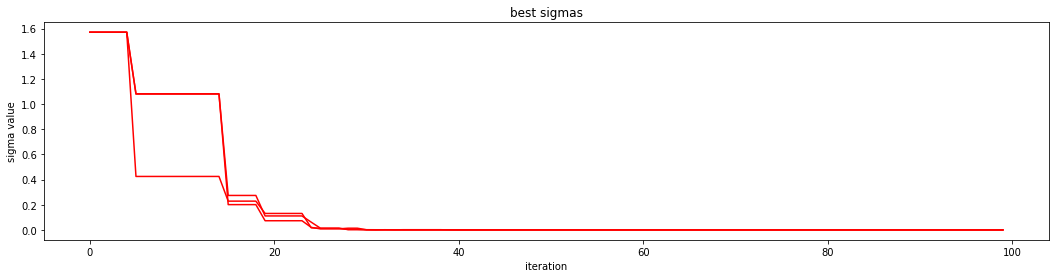

In [406]:
d = 3
N = 2000
T = 100
I = np.array([5.0, 5.0, 5.0])
S = np.array([[0.0, 0.0]])
F = np.array([[10.0, 0.0]])

kinematic_function = kinematics_cost_function((S, I), F)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    kinematic_function, d, N, T, 2*N, 2, np.pi/2, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -np.pi, np.pi)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

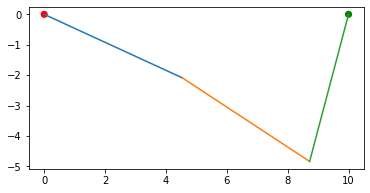

In [407]:
plot_result(S[0], best_chromosome, I, F[0])

Iteration 0000 : best score = -0.08539155, mean score = -91.63618415.
Iteration 0010 : best score = -0.00505049, mean score = -8.25685703.
Iteration 0020 : best score = -0.00021384, mean score = -2.93219272.
Iteration 0030 : best score = -0.00019725, mean score = -0.25738952.
Iteration 0040 : best score = -0.00000138, mean score = -0.00480029.
Iteration 0050 : best score = -0.00000010, mean score = -0.00014655.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000408.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000012.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


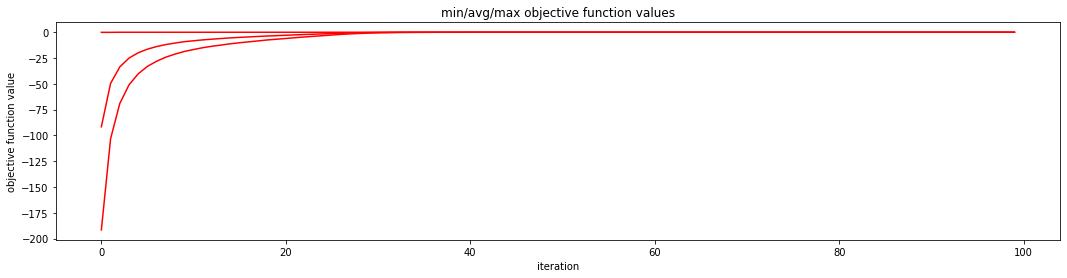

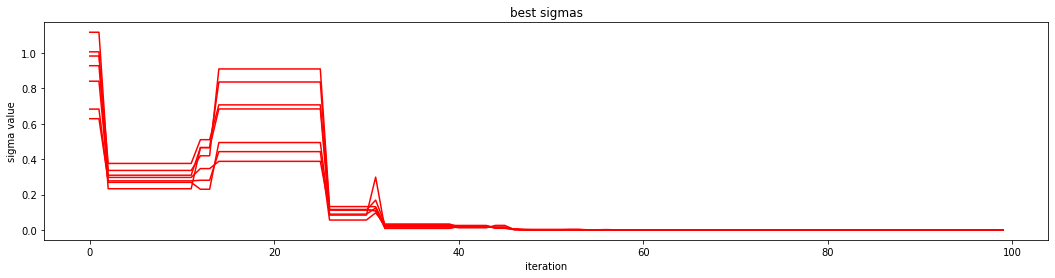

In [412]:
d = 7
N = 4000
T = 100
I = np.array([5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0])
S = np.array([[0.0, 0.0]])
F = np.array([[10.0, 10.0]])

kinematic_function = kinematics_cost_function((S, I), F)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    kinematic_function, d, N, T, 2*N, 2, np.pi/4, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -np.pi, np.pi)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

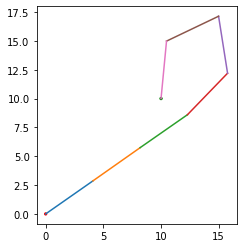

In [413]:
plot_result(S[0], best_chromosome, I, F[0])

Iteration 0000 : best score = -0.06055842, mean score = -113.63093186.
Iteration 0010 : best score = -0.00213518, mean score = -9.13736214.
Iteration 0020 : best score = -0.00034480, mean score = -3.51200326.
Iteration 0030 : best score = -0.00009742, mean score = -0.32239605.
Iteration 0040 : best score = -0.00000040, mean score = -0.00563578.
Iteration 0050 : best score = -0.00000014, mean score = -0.00015510.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000411.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000010.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


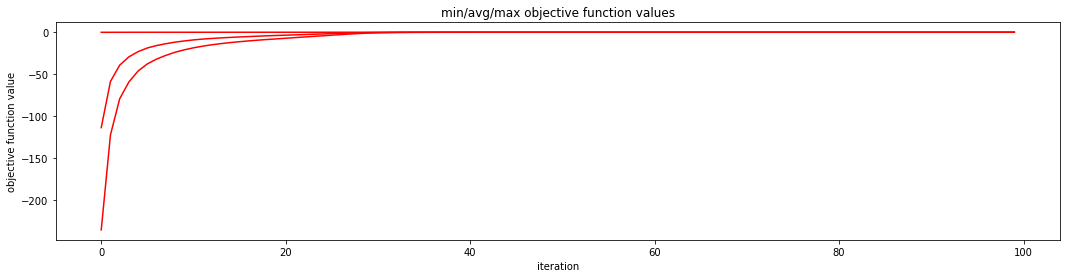

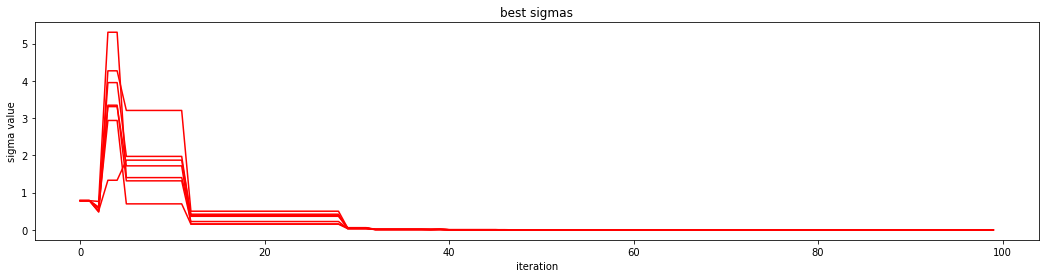

In [414]:
d = 7
N = 4000
T = 100
I = np.array([5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0])
S = np.array([[0.0, 0.0]])
F = np.array([[15.0, 7.0]])

kinematic_function = kinematics_cost_function((S, I), F)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    kinematic_function, d, N, T, 2*N, 2, np.pi/4, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -np.pi, np.pi)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

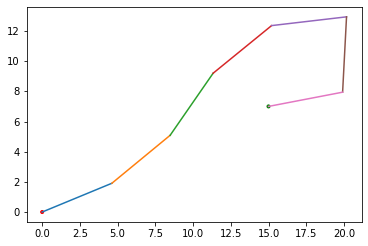

In [415]:
plot_result(S[0], best_chromosome, I, F[0])

Iteration 0000 : best score = -0.03803755, mean score = -49.10599633.
Iteration 0010 : best score = -0.00020075, mean score = -5.55953593.
Iteration 0020 : best score = -0.00020075, mean score = -2.79885909.
Iteration 0030 : best score = -0.00020075, mean score = -1.82097995.
Iteration 0040 : best score = -0.00020075, mean score = -1.30451016.
Iteration 0050 : best score = -0.00001150, mean score = -0.88255561.
Iteration 0060 : best score = -0.00001150, mean score = -0.30971567.
Iteration 0070 : best score = -0.00000097, mean score = -0.00718102.
Iteration 0080 : best score = -0.00000006, mean score = -0.00019707.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000617.


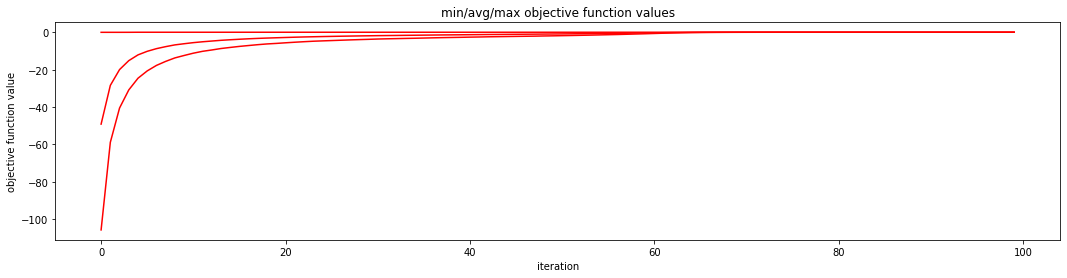

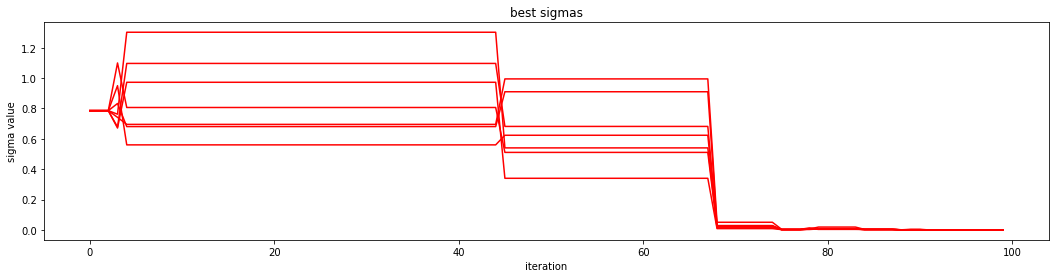

In [416]:
d = 7
N = 4000
T = 100
I = np.array([5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0])
S = np.array([[0.0, 0.0]])
F = np.array([[1.0, 1.0]])

kinematic_function = kinematics_cost_function((S, I), F)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    kinematic_function, d, N, T, 2*N, 2, np.pi/4, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -np.pi, np.pi)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

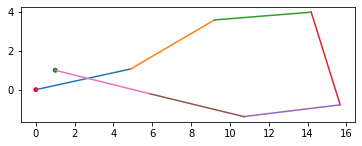

In [417]:
plot_result(S[0], best_chromosome, I, F[0])

Iteration 0000 : best score = -0.00839051, mean score = -52.24020803.
Iteration 0010 : best score = -0.00183632, mean score = -6.72358820.
Iteration 0020 : best score = -0.00183632, mean score = -3.56845735.
Iteration 0030 : best score = -0.00183632, mean score = -2.38929120.
Iteration 0040 : best score = -0.00183632, mean score = -1.81669909.
Iteration 0050 : best score = -0.00183632, mean score = -1.45690623.
Iteration 0060 : best score = -0.00153248, mean score = -1.20711385.
Iteration 0070 : best score = -0.00153248, mean score = -1.03814092.
Iteration 0080 : best score = -0.00153248, mean score = -0.90615833.
Iteration 0090 : best score = -0.00147270, mean score = -0.79890610.


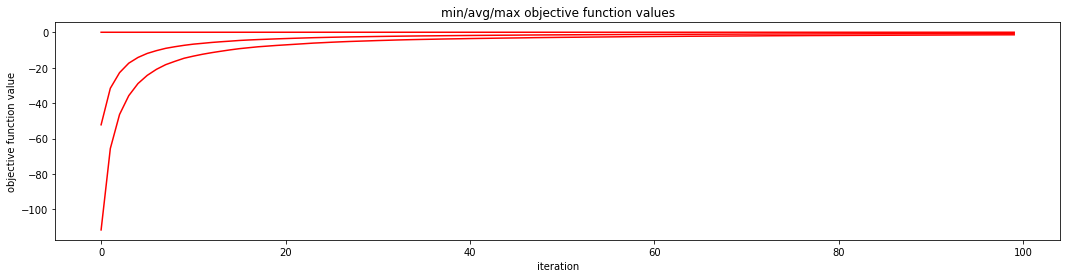

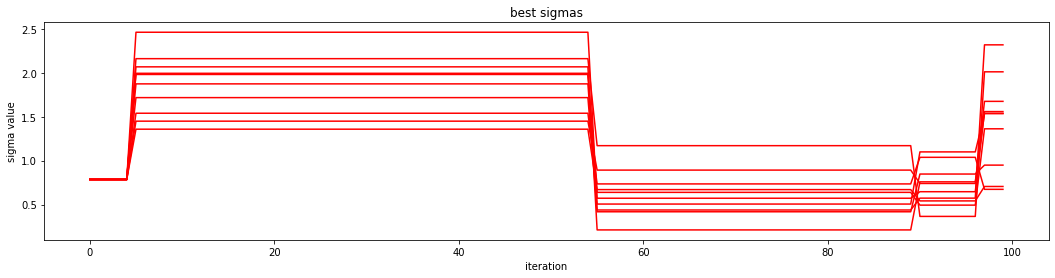

In [418]:
d = 10
N = 4000
T = 100
I = np.array([5.0, 1.0, 5.0, 5.0, 5.0, 5.0, 1.0, 2.0, 2.0, 8.0])
S = np.array([[0.0, 0.0]])
F = np.array([[1.0, 1.0]])

kinematic_function = kinematics_cost_function((S, I), F)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    kinematic_function, d, N, T, 2*N, 2, np.pi/4, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -np.pi, np.pi)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

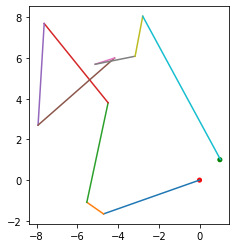

In [419]:
plot_result(S[0], best_chromosome, I, F[0])

Iteration 0000 : best score = -0.16027850, mean score = -215.16416800.
Iteration 0010 : best score = -0.00461118, mean score = -22.81434374.
Iteration 0020 : best score = -0.00461118, mean score = -10.49963741.
Iteration 0030 : best score = -0.00401092, mean score = -5.90864596.
Iteration 0040 : best score = -0.00163046, mean score = -2.68864411.
Iteration 0050 : best score = -0.00000060, mean score = -0.26865560.
Iteration 0060 : best score = -0.00000060, mean score = -0.01234252.
Iteration 0070 : best score = -0.00000027, mean score = -0.00103427.
Iteration 0080 : best score = -0.00000001, mean score = -0.00009829.
Iteration 0090 : best score = -0.00000001, mean score = -0.00000866.


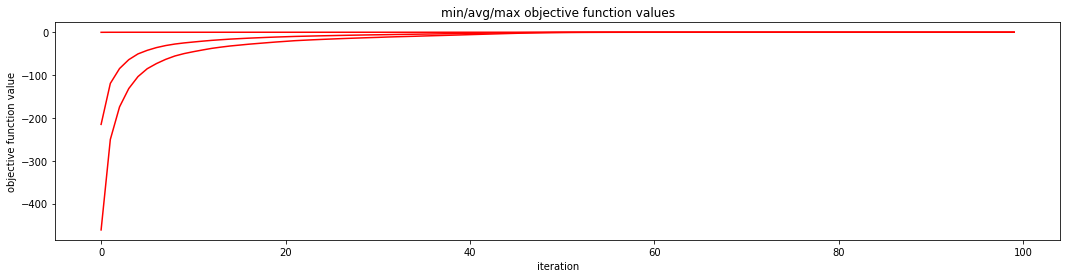

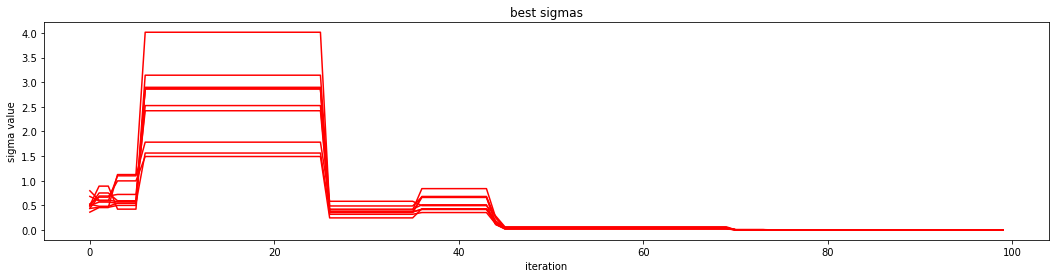

In [420]:
d = 10
N = 4000
T = 100
I = np.array([5.0, 1.0, 5.0, 20.0, 5.0, 3.0, 1.0, 2.0, 2.0, 8.0])
S = np.array([[0.0, 0.0]])
F = np.array([[14.0, -10.0]])

kinematic_function = kinematics_cost_function((S, I), F)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    kinematic_function, d, N, T, 2*N, 2, np.pi/4, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -np.pi, np.pi)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

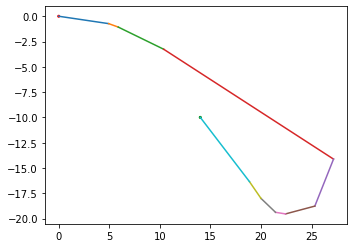

In [421]:
plot_result(S[0], best_chromosome, I, F[0])

Iteration 0000 : best score = -0.03628031, mean score = -205.00711866.
Iteration 0010 : best score = -0.02990829, mean score = -23.55221342.
Iteration 0020 : best score = -0.00425591, mean score = -10.38829767.
Iteration 0030 : best score = -0.00235992, mean score = -3.50977727.
Iteration 0040 : best score = -0.00009302, mean score = -0.21027286.
Iteration 0050 : best score = -0.00000778, mean score = -0.01446145.
Iteration 0060 : best score = -0.00000056, mean score = -0.00143699.
Iteration 0070 : best score = -0.00000001, mean score = -0.00018434.
Iteration 0080 : best score = -0.00000000, mean score = -0.00002544.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000301.


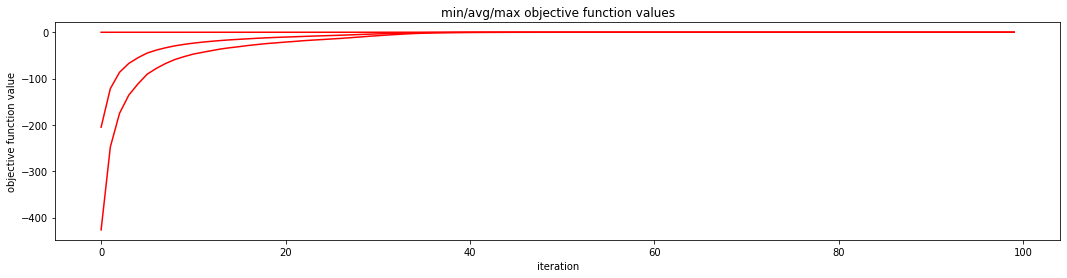

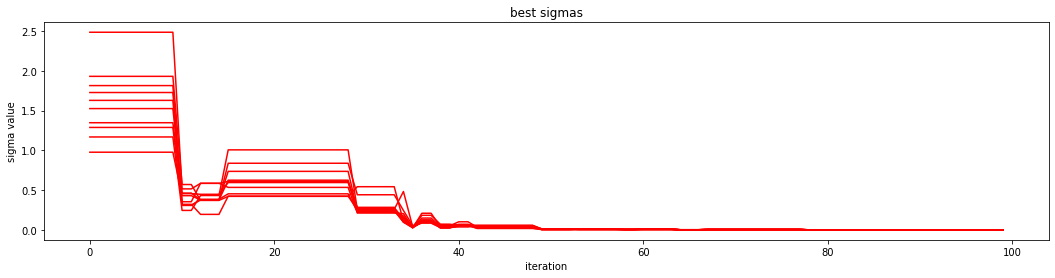

In [424]:
d = 10
N = 4000
T = 100
I = np.array([5.0, 1.0, 5.0, 20.0, 5.0, 3.0, 1.0, 2.0, 2.0, 8.0])
S = np.array([[0.0, 0.0]])
F = np.array([[14.0, 2.0]])

kinematic_function = kinematics_cost_function((S, I), F)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    kinematic_function, d, N, T, 2*N, 2, np.pi/4, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 20, -np.pi, np.pi)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

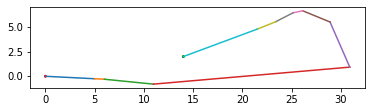

In [425]:
plot_result(S[0], best_chromosome, I, F[0])

### ZAD3


Iteration 0000 : best score = -42.36546925, mean score = -6433.96344856.
Iteration 0020 : best score = -0.22844314, mean score = -62.68811288.
Iteration 0040 : best score = -0.00562982, mean score = -16.26202304.
Iteration 0060 : best score = -0.00562982, mean score = -6.67618664.
Iteration 0080 : best score = -0.00562982, mean score = -3.58080953.
Iteration 0100 : best score = -0.00562982, mean score = -2.03643613.
Iteration 0120 : best score = -0.00562982, mean score = -1.30372942.
Iteration 0140 : best score = -0.00334237, mean score = -0.83913029.
Iteration 0160 : best score = -0.00164963, mean score = -0.58757178.
Iteration 0180 : best score = -0.00164963, mean score = -0.41518174.
Iteration 0200 : best score = -0.00164963, mean score = -0.32809260.
Iteration 0220 : best score = -0.00164963, mean score = -0.25818306.
Iteration 0240 : best score = -0.00164963, mean score = -0.19093197.
Iteration 0260 : best score = -0.00009307, mean score = -0.14642743.
Iteration 0280 : best score 

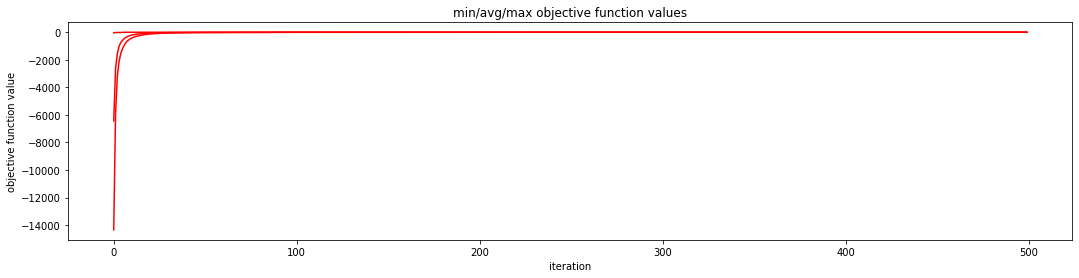

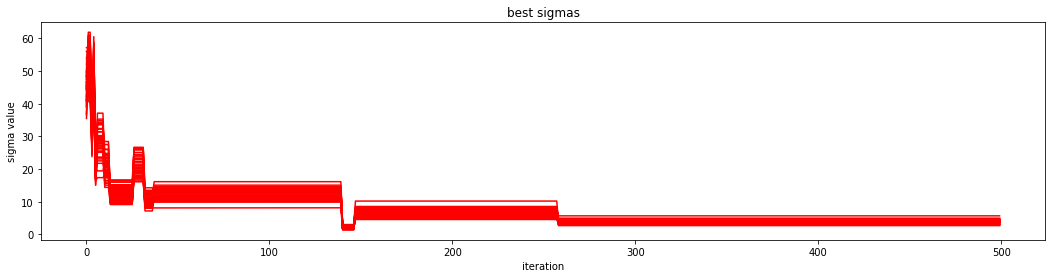

In [7]:
d = 50
N = 500
T = 500

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1a, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=50.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -77.39444224, mean score = -181836.28417520.
Iteration 0020 : best score = -4.94344583, mean score = -1150.61538937.
Iteration 0040 : best score = -2.37128442, mean score = -334.84110234.
Iteration 0060 : best score = -0.83077952, mean score = -137.89948853.
Iteration 0080 : best score = -0.38775933, mean score = -73.82789477.
Iteration 0100 : best score = -0.38775933, mean score = -43.94016934.
Iteration 0120 : best score = -0.38775933, mean score = -28.49603252.
Iteration 0140 : best score = -0.03562098, mean score = -18.39341252.
Iteration 0160 : best score = -0.03562098, mean score = -12.53051436.
Iteration 0180 : best score = -0.03562098, mean score = -8.92510666.
Iteration 0200 : best score = -0.03562098, mean score = -6.71226275.
Iteration 0220 : best score = -0.03562098, mean score = -4.74941013.
Iteration 0240 : best score = -0.03562098, mean score = -3.45434102.
Iteration 0260 : best score = -0.00491803, mean score = -2.48718101.
Iteration 0280 :

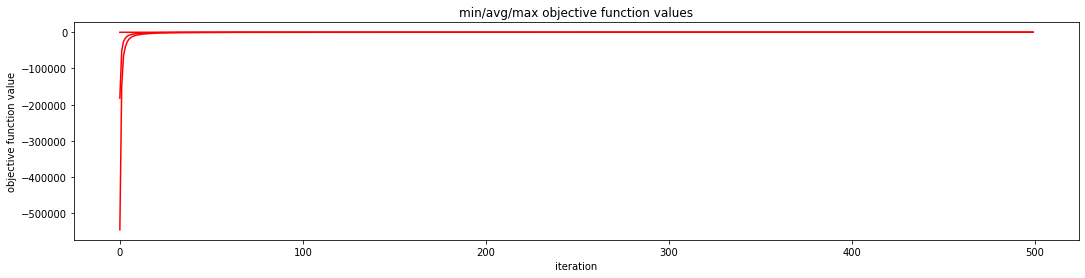

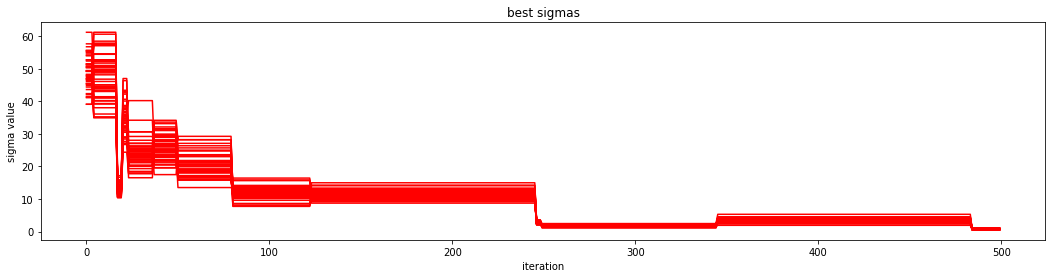

In [8]:
d = 50
N = 500
T = 500

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1b, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=50.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -2.15232316, mean score = -1710.96983920.
Iteration 0020 : best score = -0.08181048, mean score = -17.53870737.
Iteration 0040 : best score = -0.00913065, mean score = -3.33338873.
Iteration 0060 : best score = -0.00401650, mean score = -1.02153720.
Iteration 0080 : best score = -0.00000300, mean score = -0.33135148.
Iteration 0100 : best score = -0.00000300, mean score = -0.12939362.
Iteration 0120 : best score = -0.00000300, mean score = -0.06042477.
Iteration 0140 : best score = -0.00000300, mean score = -0.03297247.
Iteration 0160 : best score = -0.00000300, mean score = -0.01843804.
Iteration 0180 : best score = -0.00000300, mean score = -0.01024659.
Iteration 0200 : best score = -0.00000300, mean score = -0.00535013.
Iteration 0220 : best score = -0.00000300, mean score = -0.00305612.
Iteration 0240 : best score = -0.00000300, mean score = -0.00181991.
Iteration 0260 : best score = -0.00000101, mean score = -0.00112592.
Iteration 0280 : best score = 

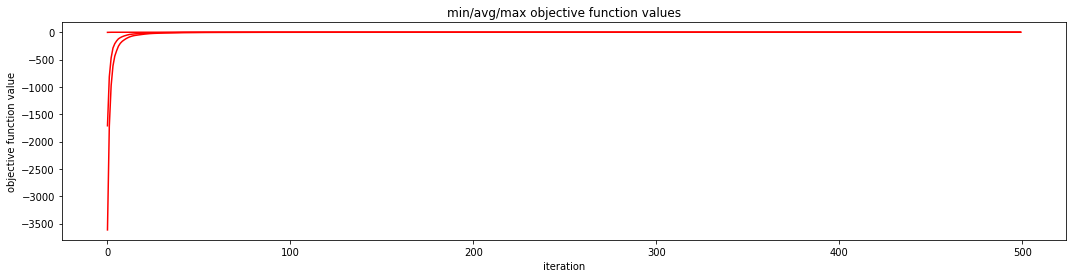

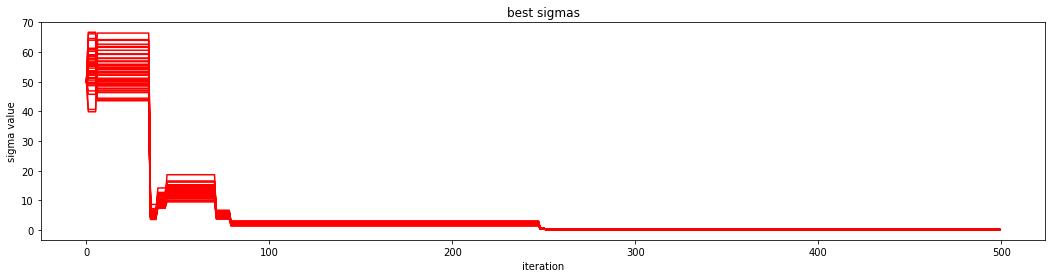

In [10]:
d = 50
N = 500
T = 500

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1c, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=50.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

In [26]:
def es2(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=10):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = -np.inf

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)

    current_population_sigmas = sigma * np.ones((1, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.ones((number_of_offspring, chromosome_length))
        
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
        # mutating the children population by adding random gaussian noise
        children_population_sigmas = (current_population_sigmas * children_population_sigmas) * np.exp(tau * np.random.randn(1, chromosome_length) + tau_0 * np.random.randn(1, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)
        
        
        children_sigma = children_population_sigmas[parent_indices[i, :], :].mean(axis=0).mean()

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas[0] = children_sigma * np.ones((1, chromosome_length))
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))
    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

Iteration 0000 : best score = -8.81605777, mean score = -12900.92342642.
Iteration 0020 : best score = -1.17106304, mean score = -574.53622801.
Iteration 0040 : best score = -0.10181436, mean score = -210.93227336.
Iteration 0060 : best score = -0.10181436, mean score = -134.25041722.
Iteration 0080 : best score = -0.10181436, mean score = -100.55604199.
Iteration 0100 : best score = -0.09697483, mean score = -67.63297592.
Iteration 0120 : best score = -0.01932892, mean score = -41.28836024.
Iteration 0140 : best score = -0.01932892, mean score = -34.21392529.
Iteration 0160 : best score = -0.00433304, mean score = -14.46889438.
Iteration 0180 : best score = -0.00258121, mean score = -5.65044337.
Iteration 0200 : best score = -0.00258121, mean score = -5.32151043.
Iteration 0220 : best score = -0.00258121, mean score = -4.98629875.
Iteration 0240 : best score = -0.00258121, mean score = -4.91618096.
Iteration 0260 : best score = -0.00258121, mean score = -4.89160509.
Iteration 0280 : b

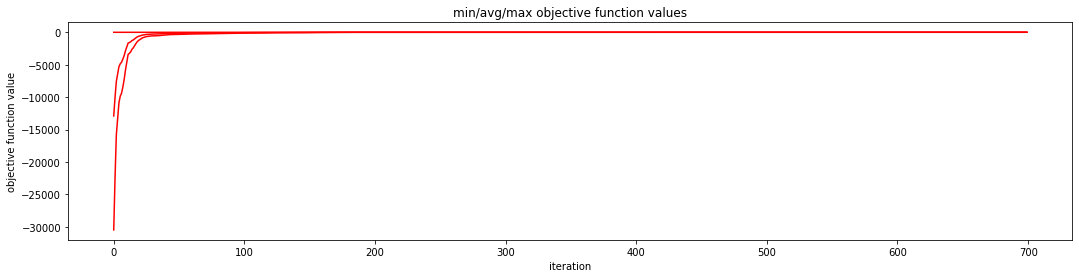

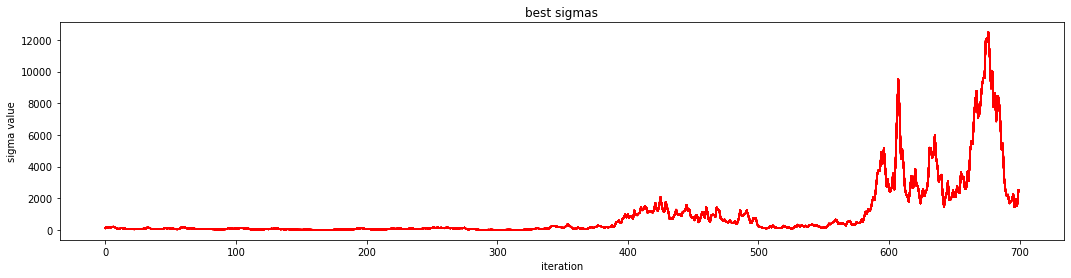

In [480]:
d = 20
N = 1000
T = 400

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es2(
    objective_function_F1a, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=100.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -139.15707181, mean score = -208074.66878876.
Iteration 0020 : best score = -0.85318898, mean score = -2517.02776552.
Iteration 0040 : best score = -0.85318898, mean score = -1277.65208879.
Iteration 0060 : best score = -0.85318898, mean score = -772.21558330.
Iteration 0080 : best score = -0.77368709, mean score = -623.94490683.
Iteration 0100 : best score = -0.61161738, mean score = -290.42324479.
Iteration 0120 : best score = -0.26359902, mean score = -188.88323296.
Iteration 0140 : best score = -0.26359902, mean score = -175.20734623.
Iteration 0160 : best score = -0.26359902, mean score = -111.89579376.
Iteration 0180 : best score = -0.26359902, mean score = -107.56040959.
Iteration 0200 : best score = -0.26359902, mean score = -107.56040959.
Iteration 0220 : best score = -0.26359902, mean score = -103.51122588.
Iteration 0240 : best score = -0.26359902, mean score = -99.51867629.
Iteration 0260 : best score = -0.26359902, mean score = -99.32729087.
I

Iteration 2340 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2360 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2380 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2400 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2420 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2440 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2460 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2480 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2500 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2520 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2540 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2560 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2580 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2600 : best score = -0.04453976, mean score = -36.31344052.
Iteration 2620 : bes

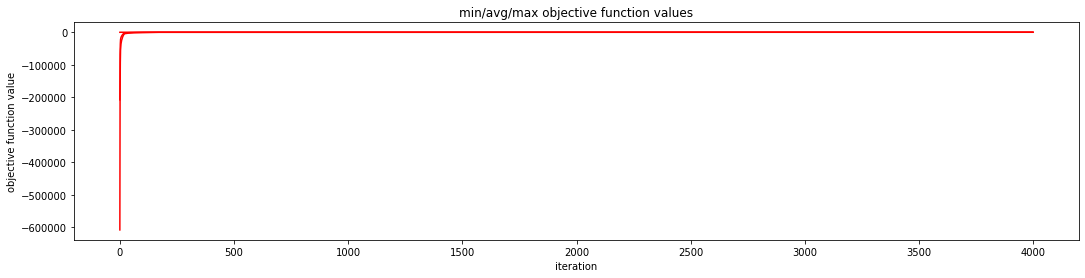

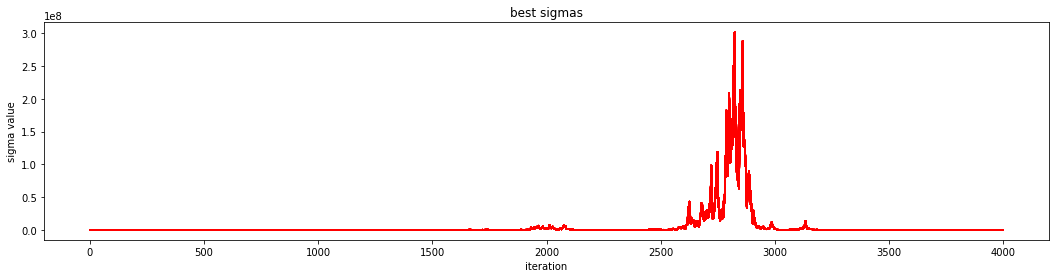

In [483]:
d = 50
N = 2000
T = 4000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es2(
    objective_function_F1b, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=50.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -6.65402194, mean score = -3566.99608743.
Iteration 0020 : best score = -6.47537408, mean score = -1426.62741469.
Iteration 0040 : best score = -0.52984748, mean score = -1257.80142338.
Iteration 0060 : best score = -0.52984748, mean score = -1236.59351527.
Iteration 0080 : best score = -0.52984748, mean score = -1235.35133669.
Iteration 0100 : best score = -0.52984748, mean score = -1233.55368090.
Iteration 0120 : best score = -0.52984748, mean score = -1224.73570870.
Iteration 0140 : best score = -0.52984748, mean score = -1219.13588285.
Iteration 0160 : best score = -0.35369626, mean score = -1187.61756076.
Iteration 0180 : best score = -0.35369626, mean score = -1186.55909715.
Iteration 0200 : best score = -0.35369626, mean score = -1182.65848738.
Iteration 0220 : best score = -0.35369626, mean score = -1180.97503750.
Iteration 0240 : best score = -0.35369626, mean score = -1180.60492000.
Iteration 0260 : best score = -0.35369626, mean score = -1179.80

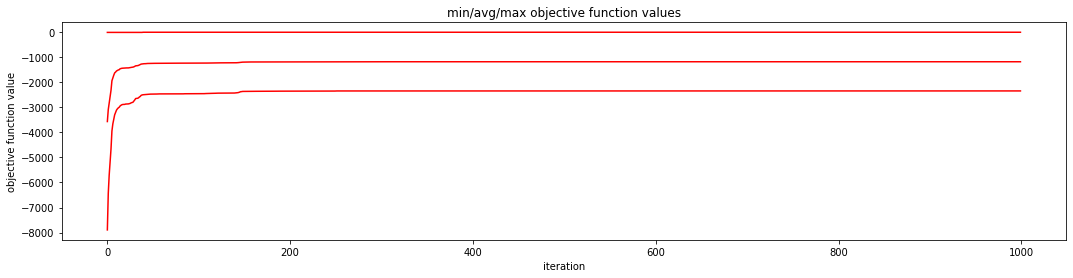

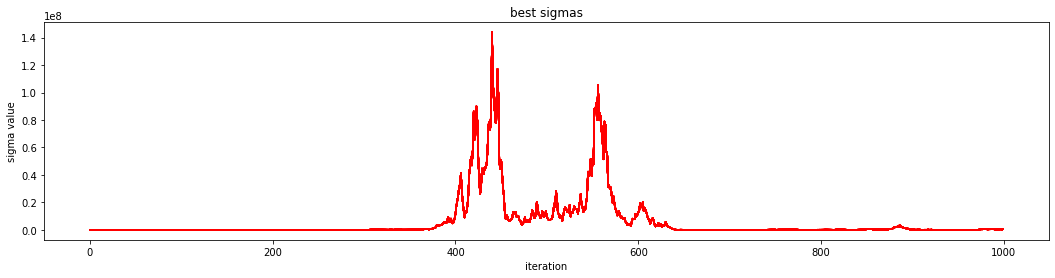

In [484]:
d = 50
N = 2000
T = 1000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es2(
    objective_function_F1c, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=200.0, tau=1/np.sqrt(2*d), tau_0=1/np.sqrt(2*np.sqrt(d)), log_frequency=20)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

In [4]:
def es3(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=10,  mn=0, mx=np.inf):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = -np.inf

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = []

    # generating an initial population
    
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    
    current_population_sigma = []
    for i in range(population_size):
        current_population_sigma.append(np.random.rand(chromosome_length, chromosome_length) + sigma * np.eye(chromosome_length))
    
    current_population_sigmas = np.array(current_population_sigma)
    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length, chromosome_length))
        
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
       
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, chromosome_length, chromosome_length))
        for i in range(len(children_population_solutions)):
            sigma_sym = children_population_sigmas[i]
            sigma_sym = (sigma_sym - np.min(sigma_sym))/np.ptp(sigma_sym)
            #sigma_sym = (sigma_sym + sigma_sym.T) / 2.0
            #sigma_sym= 2.*(sigma_sym - np.min(sigma_sym))/np.ptp(sigma_sym)-1 / 2.0
            sigma_sym = ((sigma_sym + sigma_sym.T) / 2.0) + np.eye(chromosome_length)*2
            #print(sigma_sym)
            #print(np.linalg.eigvalsh(sigma_sym))

            children_population_solutions[i] = children_population_solutions[i] + np.dot(np.random.randn(1, chromosome_length), np.linalg.cholesky(sigma_sym))
        #print(np.linalg.cholesky(S).T.shape)
        #np.dot(np.random.randn(1, chromosome_length), np.linalg.cholesky(S))
        #children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)
        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas.append(current_population_sigmas[0, :].diagonal())

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))
    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

Iteration 0000 : best score = -106.99411809, mean score = -6126.05455556.
Iteration 0020 : best score = -0.00135459, mean score = -0.31904919.
Iteration 0040 : best score = -0.00033158, mean score = -0.12540218.
Iteration 0060 : best score = -0.00033158, mean score = -0.07212629.
Iteration 0080 : best score = -0.00033158, mean score = -0.05112385.
Iteration 0100 : best score = -0.00033158, mean score = -0.04238338.
Iteration 0120 : best score = -0.00033158, mean score = -0.03482773.
Iteration 0140 : best score = -0.00033158, mean score = -0.02924972.
Iteration 0160 : best score = -0.00017765, mean score = -0.02504903.
Iteration 0180 : best score = -0.00017765, mean score = -0.02213544.
Iteration 0200 : best score = -0.00017765, mean score = -0.02014469.
Iteration 0220 : best score = -0.00017765, mean score = -0.01850992.
Iteration 0240 : best score = -0.00017765, mean score = -0.01662901.
Iteration 0260 : best score = -0.00000111, mean score = -0.01495055.
Iteration 0280 : best score =

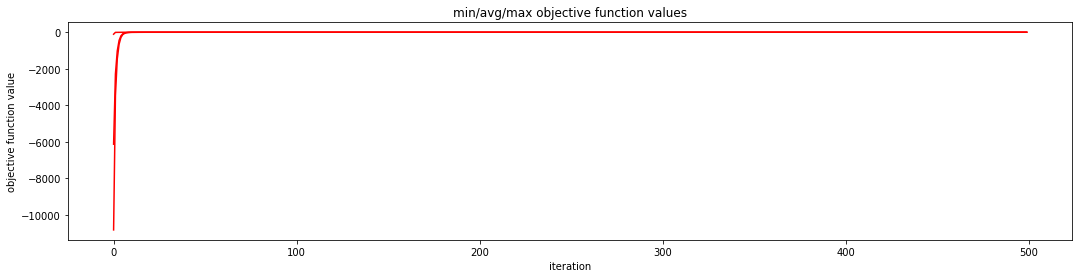

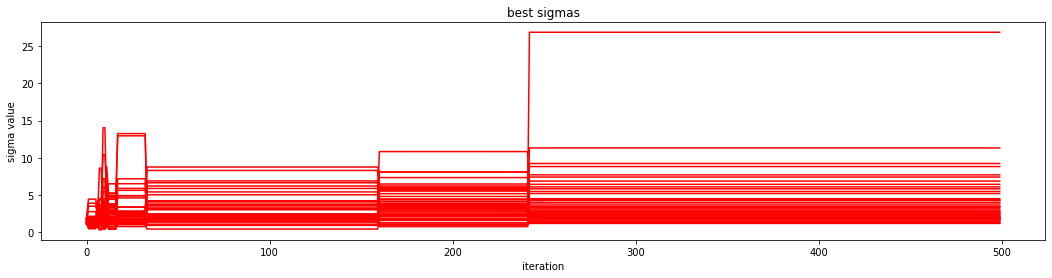

In [4]:
d = 50
N = 500
T = 500

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es3(
    objective_function_F1a, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=1.0, tau=1/np.sqrt(d), tau_0=1/np.sqrt(np.sqrt(d)), log_frequency=20)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -446.23995661, mean score = -172243.13131465.
Iteration 0020 : best score = -13.52626238, mean score = -84.98742517.
Iteration 0040 : best score = -0.00864817, mean score = -4.13124321.
Iteration 0060 : best score = -0.00195928, mean score = -1.21043705.
Iteration 0080 : best score = -0.00182175, mean score = -0.67081718.
Iteration 0100 : best score = -0.00182175, mean score = -0.46129275.
Iteration 0120 : best score = -0.00055775, mean score = -0.35000525.
Iteration 0140 : best score = -0.00055775, mean score = -0.28666029.
Iteration 0160 : best score = -0.00055775, mean score = -0.23647190.
Iteration 0180 : best score = -0.00009104, mean score = -0.20049414.
Iteration 0200 : best score = -0.00009104, mean score = -0.17861566.
Iteration 0220 : best score = -0.00009104, mean score = -0.16068863.
Iteration 0240 : best score = -0.00009104, mean score = -0.14615375.
Iteration 0260 : best score = -0.00009104, mean score = -0.13043249.
Iteration 0280 : best sco

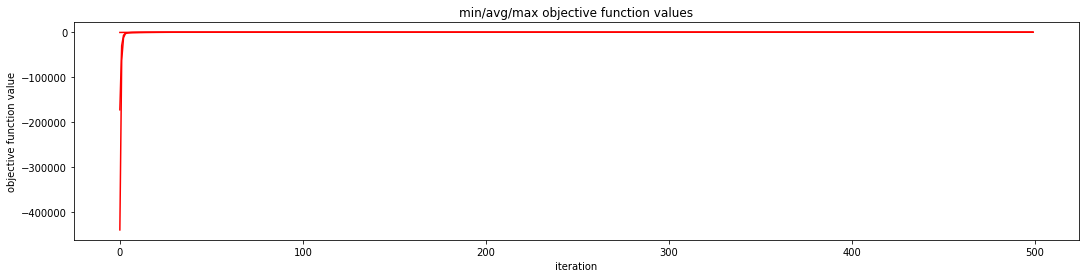

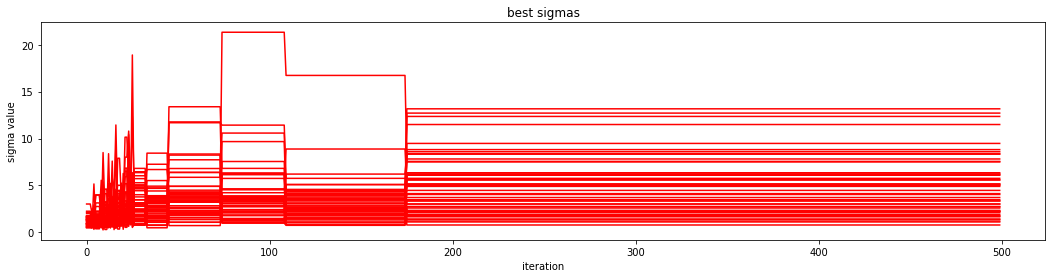

In [5]:
d = 50
N = 500
T = 500

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es3(
    objective_function_F1b, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=0.5, tau=1/np.sqrt(d), tau_0=1/np.sqrt(np.sqrt(d)), log_frequency=20)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -5.12970094, mean score = -1354.85559804.
Iteration 0020 : best score = -0.00014491, mean score = -0.11300821.
Iteration 0040 : best score = -0.00005300, mean score = -0.04128895.
Iteration 0060 : best score = -0.00002743, mean score = -0.02453353.
Iteration 0080 : best score = -0.00002743, mean score = -0.01802908.
Iteration 0100 : best score = -0.00002743, mean score = -0.01400241.
Iteration 0120 : best score = -0.00002743, mean score = -0.01143945.
Iteration 0140 : best score = -0.00002743, mean score = -0.00979512.
Iteration 0160 : best score = -0.00002743, mean score = -0.00818628.
Iteration 0180 : best score = -0.00002743, mean score = -0.00738609.
Iteration 0200 : best score = -0.00002743, mean score = -0.00655551.
Iteration 0220 : best score = -0.00002743, mean score = -0.00582921.
Iteration 0240 : best score = -0.00002743, mean score = -0.00529529.
Iteration 0260 : best score = -0.00000413, mean score = -0.00489885.
Iteration 0280 : best score = -

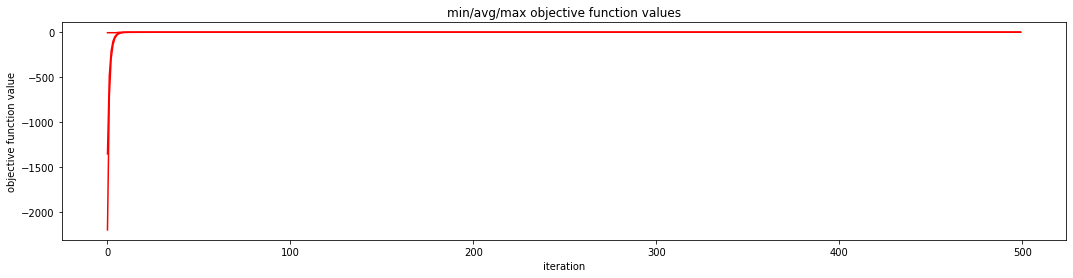

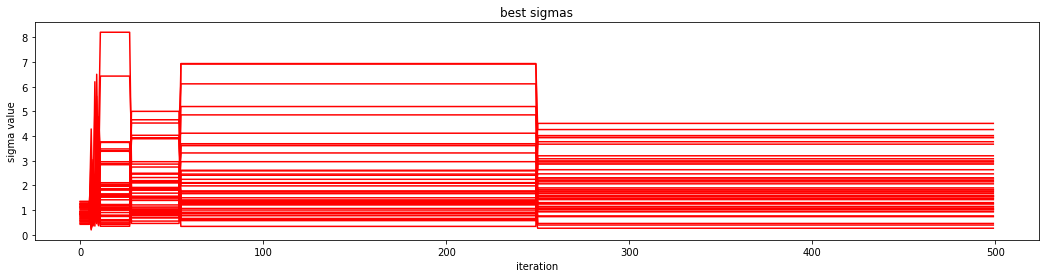

In [5]:
d = 50
N = 500
T = 500

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es3(
    objective_function_F1c, d, N, T, number_of_offspring=2*N, number_of_parents=2, sigma=0.4, tau=1/np.sqrt(d), tau_0=1/np.sqrt(np.sqrt(d)), log_frequency=20)


plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()